$$
{\huge \textbf{Dark-Fiber Charakterisierung}}\\
$$

$$
{\huge \textbf{für entanglement polarisierter QKD}}\\ 
$$

$$
{\normalsize \textbf{Übersicht und Aufbereitung von Messverfahren und Messdaten}}
$$

**Autor:** Laura Komma  
**Datensatz:** Erfurt - Sundhausen

# Einleitung: Kenngrößen, Messgerät und Datengrundlage

## Ressourcen und Literatur
- [Messdaten](https://www.transfernow.net/dl/20250819MaLA5gU4/lQKfT9vG)
- [Messgerät](https://www.thorlabs.com/_sd.cfm?fileName=MTN007790-D02.pdf&partNumber=PAX1000IR2/M)
- [Abbildung: Poincaré-Kugel](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=14200)

## Kenngrößen: Bedeutung und Einheiten

| Kenngöße | Einheit | Bedeutung |
| :-: | :-: | :-: |
| Time | date hh:mm:ss | absoluter Messzeitpunkt |
| Elapsed Time  | hh:mm:ss:ms | relativer Messzeitpunkt |
| Normalized s1, s2, s3  | - | Normierte Stokes-Komponenten |
| S0  | mW | Gesamtleistung |
| S1, S2, S3  | mW | Stokes-Komponenten |
| Azimuth   | ° | Winkel in der Poincaré-Kugel (horizontaler Winkel) |
| Ellipticity   | ° | Maß für elliptische Polarisation (vertikaler Winkel) |
| DOP  | % | Degree of Polarization |
| DOCP  | % | Degree of Circular Polarization (Zirkularitätsmaß) |
| DOLP  | % | Degree of Linear Polarization (Linearitätsmaß)|
| Power  | mW / dBm | Gesamtleistung |
| Pol Power  | mW / dBm | Polarisierter Anteil (= DOP × Gesamtleistung) |
| Unipol Power  | mW / dBm | Unpolarisierter Anteil (= (1–DOP) × Gesamtleistung)|
| Phase Difference  | ° | Phasenunterschied zw. Polarisationsmoden |
|Power-Split-Ratio| - | Leistungsverhältnis zweier Polarisationsrichtungen|
| Warning  | - | Hinweis für fehlerhafte Messung |

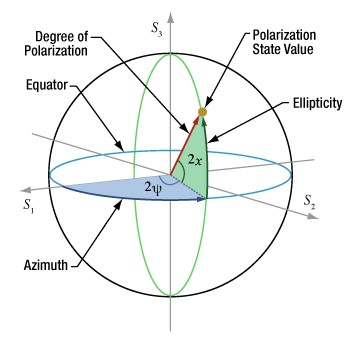

In [1]:
from IPython.display import Image
Image(filename="./img/poincare.jpg")

\newpage
## Messgerät und Messverfahren

| Kenngöße | Info |
| :-: | :-: |
| Device | PAX1000IR2/M |
| Serial Number | M00773008 |
| Firmware Version | 1.2.1 |
| Software Version | 1.4.2002.183 |
| Wavelength [nm] | 1560 |
| Basic Sample Rate [Hz] | 60 |
| Operating Mode | revolutions for one measurement,<br> 2048 points for FFT |

# Aufbereitung der Messdaten
## Verwendete Libraries / Softwaretools

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import datetime
import requests

from prettytable import PrettyTable

## Eigene Hilfsfunktionen

In [4]:
def fast_parse_elapsed(s):
    try:
        d, h, m, s, ms = s.replace('.', ':').split(':')
        return pd.Timedelta(days=int(d), hours=int(h), minutes=int(m), seconds=int(s), milliseconds=int(ms))
    except:
        return pd.NaT

## Datenaufbereitungsschritte

In [5]:
filename ='20_02_to_26_02_Sundhausen to FZE port 2.csv'
skip = 8
sep = ";"

In [6]:
columns = ['Time[date hh:mm:ss] ', ' Elapsed Time [hh:mm:ss:ms]', ' Normalized s 1 ', ' Normalized s 2 ', ' Normalized s 3 ', ' S 0 [mW]', ' S 1 [mW]', ' S 2 [mW]', ' S 3 [mW]', ' Azimuth[°] ', ' Ellipticity[°] ', ' DOP[%] ', ' DOCP[%] ', ' DOLP[%] ', ' Power[mW] ', ' Pol Power[mW] ', ' Unpol Power[mW] ', ' Power[dBm] ', ' Pol Power[dBm] ', ' Unpol Power[dBm] ', ' Power-Split-Ratio ', ' Phase Difference[°] ', ' Warning']
for c in range(len(columns)):
    print(c, ': ', columns[c])

0 :  Time[date hh:mm:ss] 
1 :   Elapsed Time [hh:mm:ss:ms]
2 :   Normalized s 1 
3 :   Normalized s 2 
4 :   Normalized s 3 
5 :   S 0 [mW]
6 :   S 1 [mW]
7 :   S 2 [mW]
8 :   S 3 [mW]
9 :   Azimuth[°] 
10 :   Ellipticity[°] 
11 :   DOP[%] 
12 :   DOCP[%] 
13 :   DOLP[%] 
14 :   Power[mW] 
15 :   Pol Power[mW] 
16 :   Unpol Power[mW] 
17 :   Power[dBm] 
18 :   Pol Power[dBm] 
19 :   Unpol Power[dBm] 
20 :   Power-Split-Ratio 
21 :   Phase Difference[°] 
22 :   Warning


# Analyse der Messdaten
## Fehler (Warning)

In [7]:
warning = pd.read_csv(filename,skiprows=skip, usecols=[columns[22]], sep=sep)

C:\Users\laura\AppData\Local\Temp\ipykernel_15848\1864455350.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  warning = pd.read_csv(filename,skiprows=skip, usecols=[columns[22]], sep=sep)


In [8]:
warning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369654 entries, 0 to 2369653
Data columns (total 1 columns):
 #   Column    Dtype 
---  ------    ----- 
 0    Warning  object
dtypes: object(1)
memory usage: 18.1+ MB


In [9]:
warning.isnull().sum()

Warning    2368270
dtype: int64

In [10]:
len(warning)- warning.isnull().sum()

Warning    1384
dtype: int64

## Zeitwerte (Time, Elapsed Time)

In [11]:
time = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[1]], sep=sep)

In [12]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369654 entries, 0 to 2369653
Data columns (total 2 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Time[date hh:mm:ss]          object
 1    Elapsed Time [hh:mm:ss:ms]  object
dtypes: object(2)
memory usage: 36.2+ MB


In [13]:
time.isnull().sum()

Time[date hh:mm:ss]            0
 Elapsed Time [hh:mm:ss:ms]    0
dtype: int64

In [14]:
time[columns[0]] = pd.to_datetime(time[columns[0]])
time['time_difference'] = time[columns[0]].diff()
time['time_frequency'] =  1 / time['time_difference'].dt.total_seconds()
time['time_difference']

0                            NaT
1         0 days 00:00:00.250000
2         0 days 00:00:00.250000
3         0 days 00:00:00.240000
4         0 days 00:00:00.250000
                   ...          
2369649   0 days 00:00:00.250000
2369650   0 days 00:00:00.250000
2369651   0 days 00:00:00.250000
2369652   0 days 00:00:00.240000
2369653   0 days 00:00:00.250000
Name: time_difference, Length: 2369654, dtype: timedelta64[ns]

In [15]:
time[columns[1]] = time[columns[1]].apply(fast_parse_elapsed)
time['elapsed_time_difference'] = time[columns[1]].diff()
time['elapsed_time_frequency'] =  1 / time['elapsed_time_difference'].dt.total_seconds()
time['elapsed_time_difference']

0                            NaT
1         0 days 00:00:00.253000
2         0 days 00:00:00.245000
3         0 days 00:00:00.249000
4         0 days 00:00:00.250000
                   ...          
2369649   0 days 00:00:00.246000
2369650   0 days 00:00:00.248000
2369651   0 days 00:00:00.249000
2369652   0 days 00:00:00.245000
2369653   0 days 00:00:00.248000
Name: elapsed_time_difference, Length: 2369654, dtype: timedelta64[ns]

In [16]:
t = PrettyTable([' ', 'Time', 'Elapsed Time'])
t.add_row(['Max', time['time_difference'].max(), time['elapsed_time_difference'].max()])
t.add_row(['Min', time['time_difference'].min(),  time['elapsed_time_difference'].min()])
t.add_row(['Mean', time['time_difference'].mean(),  time['elapsed_time_difference'].mean()])
t.add_row(['Std', time['time_difference'].std(),  time['elapsed_time_difference'].std()])
t.add_row(['Most', time['time_difference'].value_counts(dropna=True).idxmax(), time['elapsed_time_difference'].value_counts(dropna=True).idxmax()])
t.add_row(['Mean Frequency', time['time_frequency'].mean(),  time['elapsed_time_frequency'].mean()])

t

+----------------+---------------------------+---------------------------+
|                |            Time           |        Elapsed Time       |
+----------------+---------------------------+---------------------------+
|      Max       |   0 days 00:00:00.960000  |   0 days 00:00:00.958000  |
|      Min       |   0 days 00:00:00.240000  |   0 days 00:00:00.244000  |
|      Mean      | 0 days 00:00:00.255231293 | 0 days 00:00:00.255231293 |
|      Std       | 0 days 00:00:00.008582554 | 0 days 00:00:00.007129904 |
|      Most      |   0 days 00:00:00.260000  |   0 days 00:00:00.256000  |
| Mean Frequency |     3.9209356490794565    |     3.9195562621169633    |
+----------------+---------------------------+---------------------------+

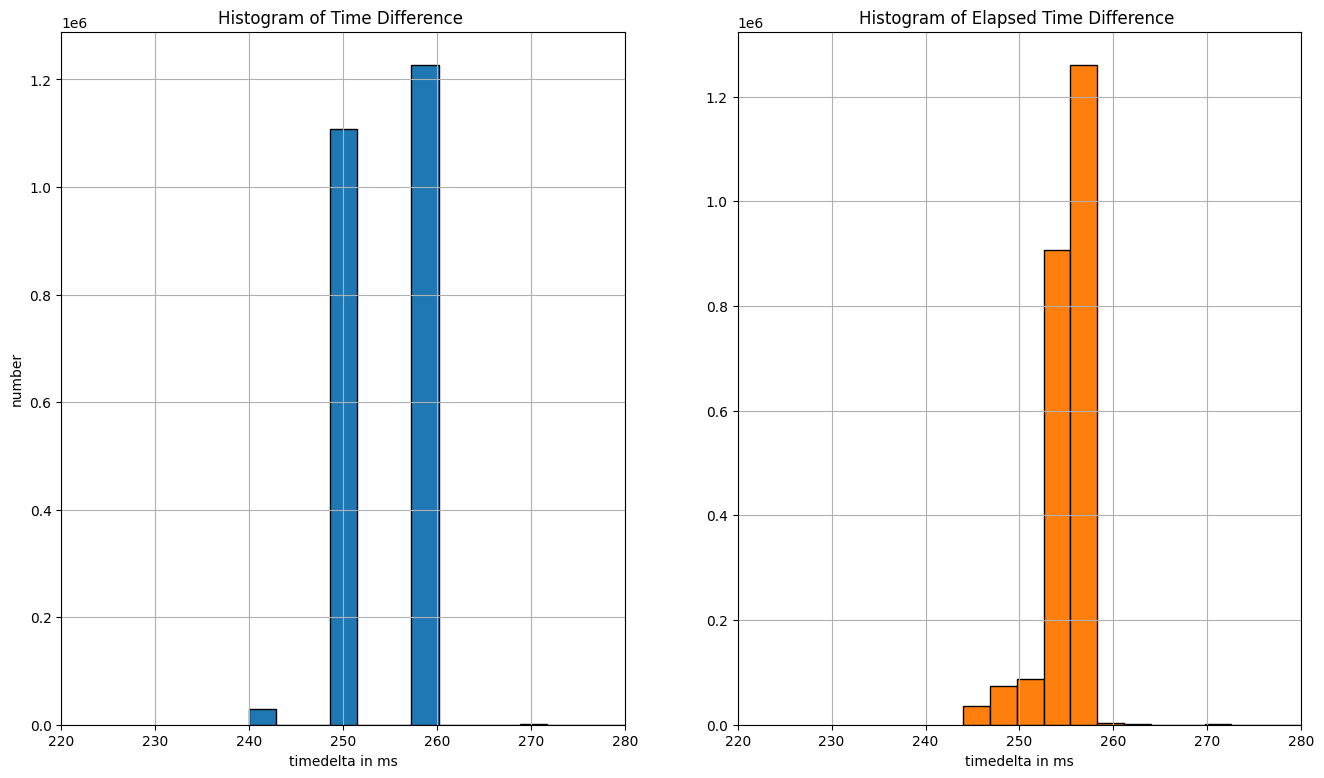

In [20]:
time_difference = time['time_difference'].dt.total_seconds() * 1000
elapsed_time_difference = time['elapsed_time_difference'].dt.total_seconds() * 1000

plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(time_difference, bins=250, color='tab:blue', edgecolor='black')
plt.xlim([220, 280])
plt.grid()
plt.xlabel('timedelta in ms')
plt.ylabel('number') 
plt.title('Histogram of Time Difference ')

plt.subplot(1, 2, 2)
plt.hist(elapsed_time_difference, bins=250, color='tab:orange', edgecolor='black')
plt.xlim([220, 280])
plt.grid()
plt.xlabel('timedelta in ms')
plt.title('Histogram of Elapsed Time Difference ')

plt.show()

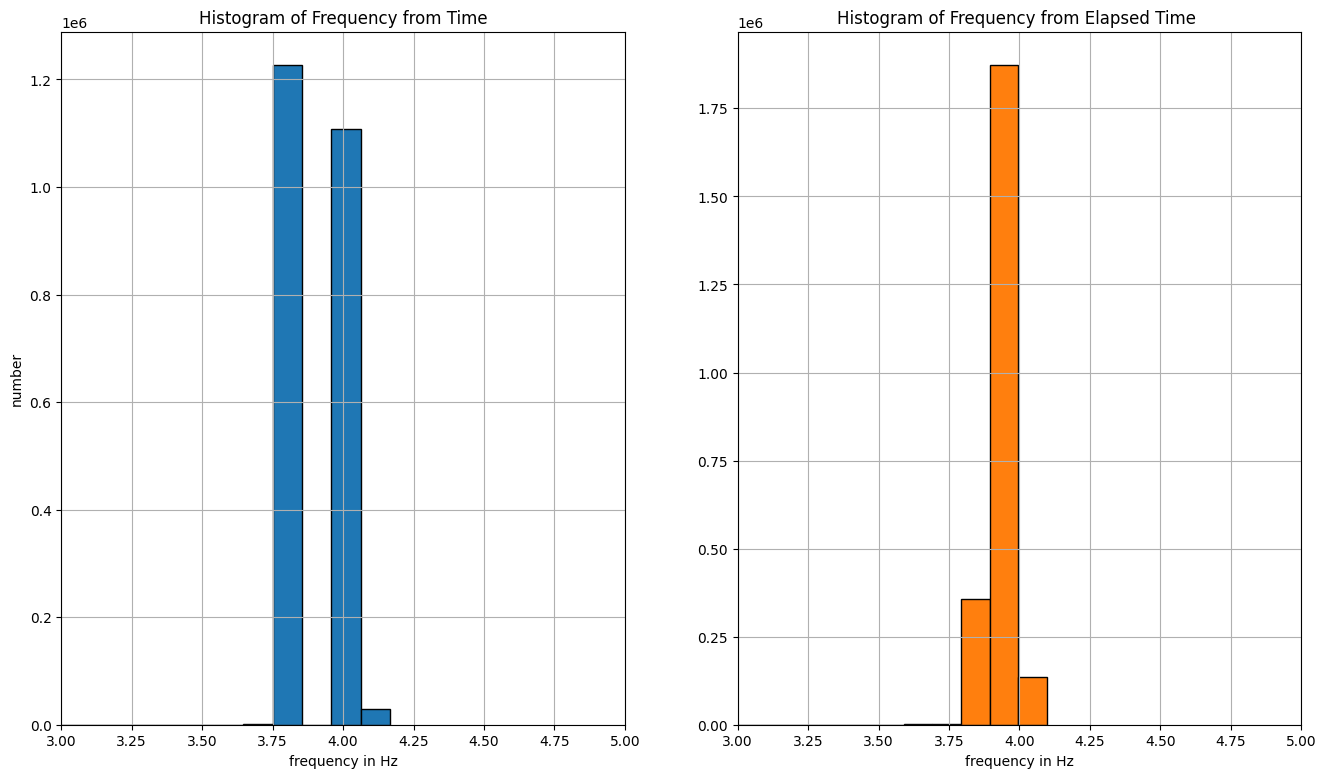

In [22]:
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(time['time_frequency'], bins=30, color='tab:blue', edgecolor='black')
plt.xlim([3, 5])
plt.grid()
plt.xlabel('frequency in Hz')
plt.ylabel('number') 
plt.title('Histogram of Frequency from Time')

plt.subplot(1, 2, 2)
plt.hist(time['elapsed_time_frequency'], bins=30, color='tab:orange', edgecolor='black')
plt.xlim([3, 5])
plt.grid()
plt.xlabel('frequency in Hz')
plt.title('Histogram of Frequency from Elapsed Time ')

plt.show()

## Polarisationsgrade (DOP, DOCP, DOLP)

In [23]:
degree = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[11], columns[12], columns[13]], sep=sep)

In [24]:
degree[columns[0]] = pd.to_datetime(degree[columns[0]])
degree.set_index(columns[0], inplace=True)

In [25]:
degree.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0    DOP[%]    float64
 1    DOCP[%]   float64
 2    DOLP[%]   float64
dtypes: float64(3)
memory usage: 72.3 MB


In [26]:
degree.isnull().sum()

DOP[%]      0
DOCP[%]     0
DOLP[%]     0
dtype: int64

In [27]:
degree.describe()

DOP[%]       DOCP[%]       DOLP[%] 
count  2.369654e+06  2.369654e+06  2.369654e+06
mean   1.000893e+02  4.901668e+01  7.972596e+01
std    6.368664e+00  2.815734e+01  2.251058e+01
min    5.856000e+01  0.000000e+00  5.000000e-02
25%    9.694000e+01  2.490000e+01  6.766000e+01
50%    9.974000e+01  4.894000e+01  8.564000e+01
75%    1.030100e+02  7.280000e+01  9.610000e+01
max    1.737000e+02  1.219400e+02  1.714200e+02

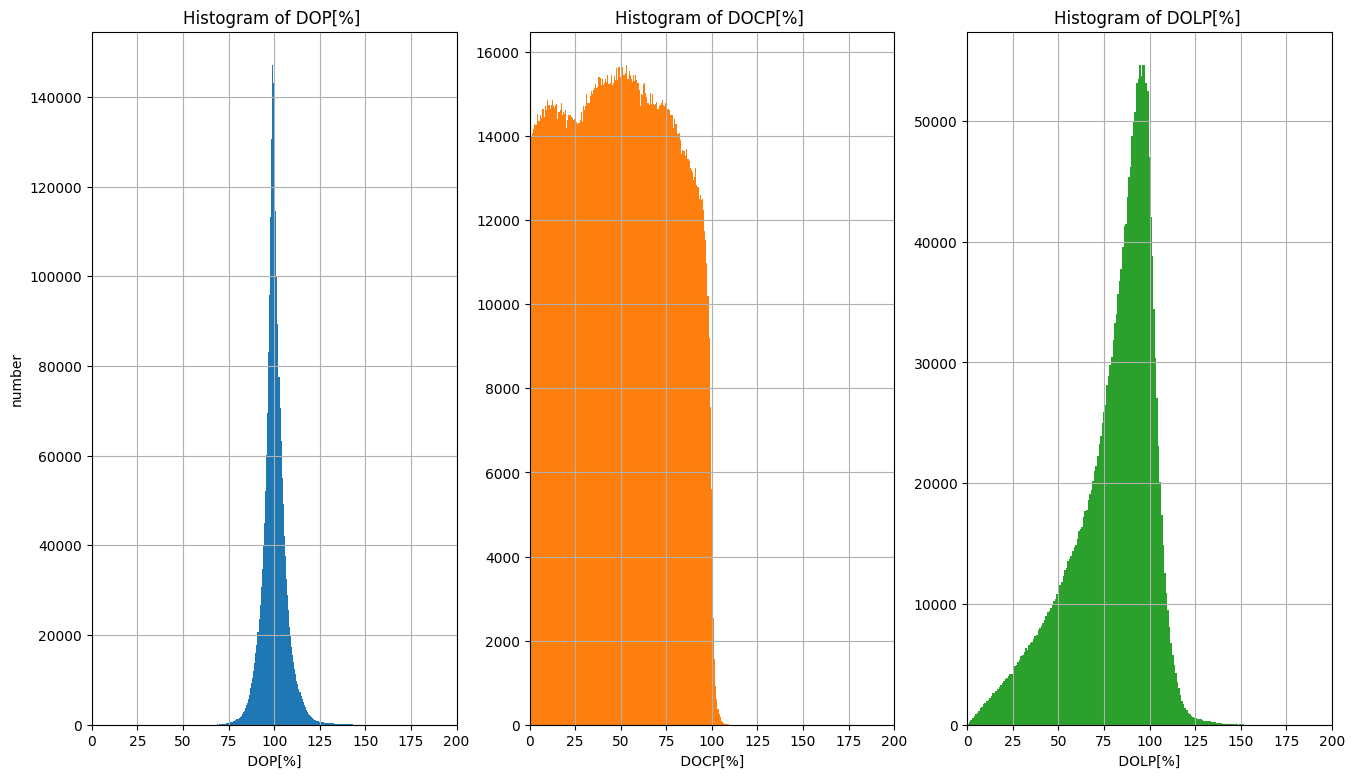

In [31]:
plt.figure(figsize = (16,9))
plt.subplot(1, 3, 1)
plt.hist(degree[columns[11]], bins=200, color='tab:blue')
plt.xlim([0, 200])
plt.grid()
plt.xlabel(columns[11])
plt.ylabel('number') 
plt.title('Histogram of DOP[%] ')

plt.subplot(1, 3, 2)
plt.hist(degree[columns[12]], bins=200, color='tab:orange')
plt.xlim([0, 200])
plt.grid()
plt.xlabel(columns[12])
plt.title('Histogram of DOCP[%] ')

plt.subplot(1, 3, 3)
plt.hist(degree[columns[13]], bins=200, color='tab:green')
plt.xlim([0, 200])
plt.grid()
plt.xlabel(columns[13])
plt.title('Histogram of DOLP[%] ')

plt.show()

In [29]:
one_second = datetime.timedelta(seconds=1)
one_minute = datetime.timedelta(minutes=1)
one_hour = datetime.timedelta(hours=1)
one_day = datetime.timedelta(days=1)

start_time = datetime.datetime.strptime(str(degree.index[0]), '%Y-%m-%d %H:%M:%S.%f')
end_time_second = start_time + one_second
end_time_minute = start_time + one_minute
end_time_hour = start_time + one_hour
end_time_day = start_time + one_day

In [30]:
first_second = degree.loc[(degree.index >= start_time) & (degree.index < end_time_second)]
first_second

DOP[%]   DOCP[%]   DOLP[%] 
Time[date hh:mm:ss]                                 
2025-02-20 13:28:29.460    94.85     55.56     76.88
2025-02-20 13:28:29.710   117.26     56.83    102.57
2025-02-20 13:28:29.960   113.20     51.90    100.60
2025-02-20 13:28:30.200    92.12     45.25     80.25
2025-02-20 13:28:30.450   111.18     61.43     92.67

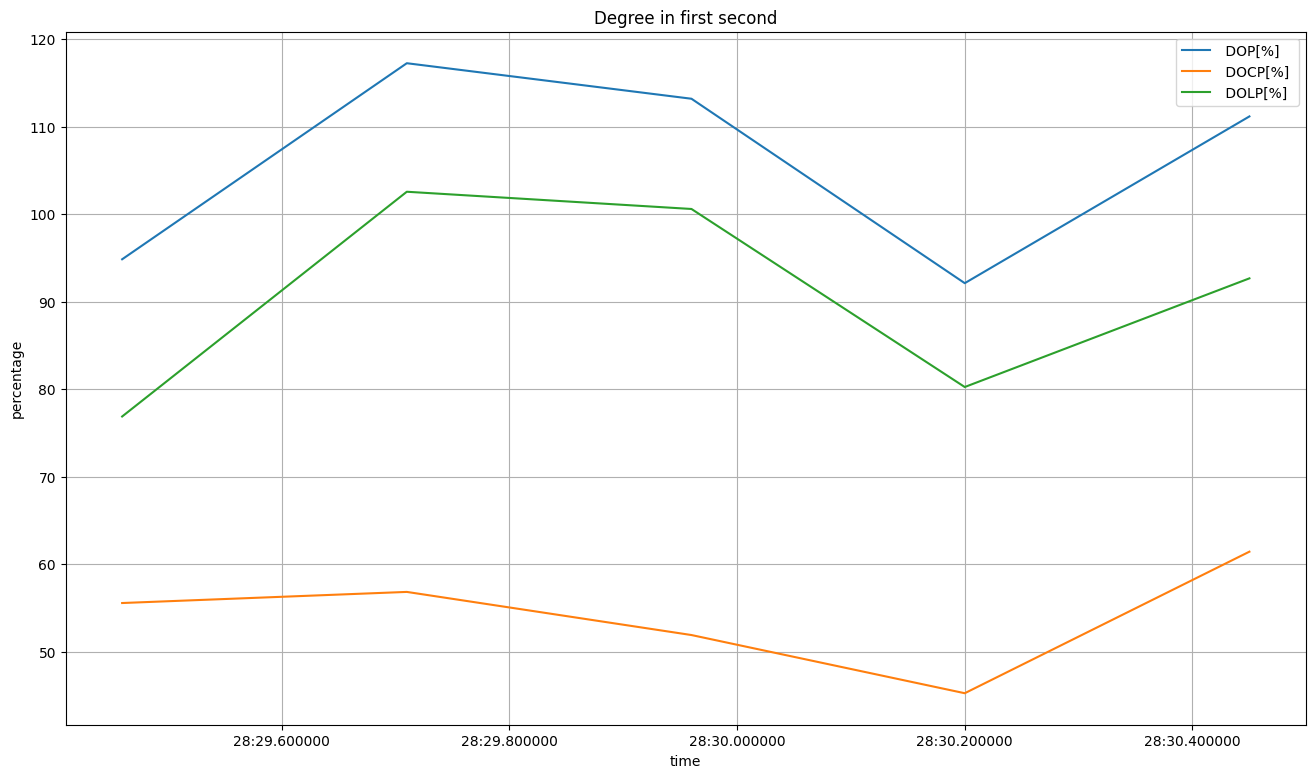

In [32]:
plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[11]], label = columns[11])
plt.plot(first_second.index, first_second[columns[12]], label = columns[12])
plt.plot(first_second.index, first_second[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree in first second')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

In [33]:
first_minute = degree.loc[(degree.index >= start_time) & (degree.index < end_time_minute)]
first_minute

DOP[%]   DOCP[%]   DOLP[%] 
Time[date hh:mm:ss]                                 
2025-02-20 13:28:29.460    94.85     55.56     76.88
2025-02-20 13:28:29.710   117.26     56.83    102.57
2025-02-20 13:28:29.960   113.20     51.90    100.60
2025-02-20 13:28:30.200    92.12     45.25     80.25
2025-02-20 13:28:30.450   111.18     61.43     92.67
...                          ...       ...       ...
2025-02-20 13:29:28.330   121.97     72.07     98.40
2025-02-20 13:29:28.590    81.71     47.67     66.36
2025-02-20 13:29:28.840   116.38     68.80     93.87
2025-02-20 13:29:29.100    84.38     54.86     64.11
2025-02-20 13:29:29.350   122.30     69.54    100.60

[236 rows x 3 columns]

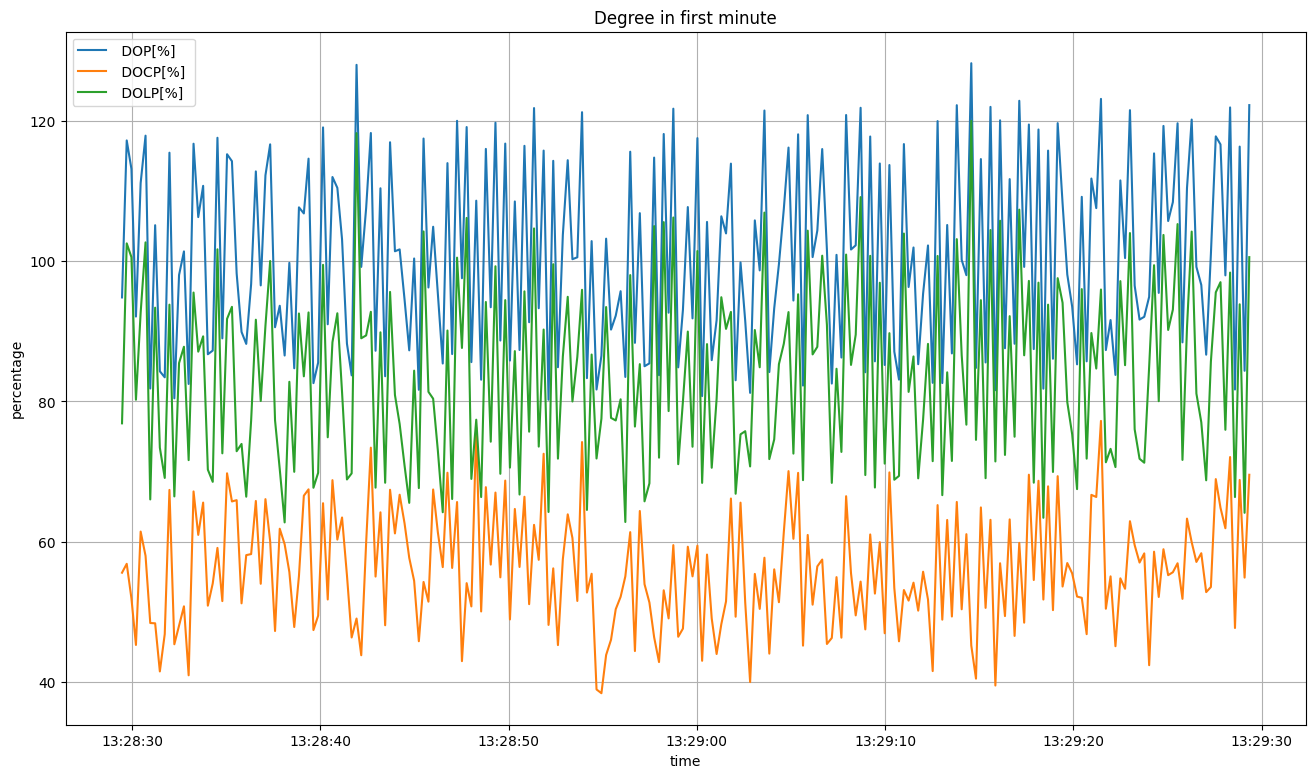

In [34]:
plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[11]], label = columns[11])
plt.plot(first_minute.index, first_minute[columns[12]], label = columns[12])
plt.plot(first_minute.index, first_minute[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree in first minute')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

In [35]:
first_hour = degree.loc[(degree.index >= start_time) & (degree.index < end_time_hour)]
first_hour

DOP[%]   DOCP[%]   DOLP[%] 
Time[date hh:mm:ss]                                 
2025-02-20 13:28:29.460    94.85     55.56     76.88
2025-02-20 13:28:29.710   117.26     56.83    102.57
2025-02-20 13:28:29.960   113.20     51.90    100.60
2025-02-20 13:28:30.200    92.12     45.25     80.25
2025-02-20 13:28:30.450   111.18     61.43     92.67
...                          ...       ...       ...
2025-02-20 14:28:28.310    91.38     75.28     51.79
2025-02-20 14:28:28.570   101.78     75.38     68.40
2025-02-20 14:28:28.830    89.44     68.29     57.76
2025-02-20 14:28:29.080   107.24     79.08     72.43
2025-02-20 14:28:29.340    87.07     67.75     54.70

[14098 rows x 3 columns]

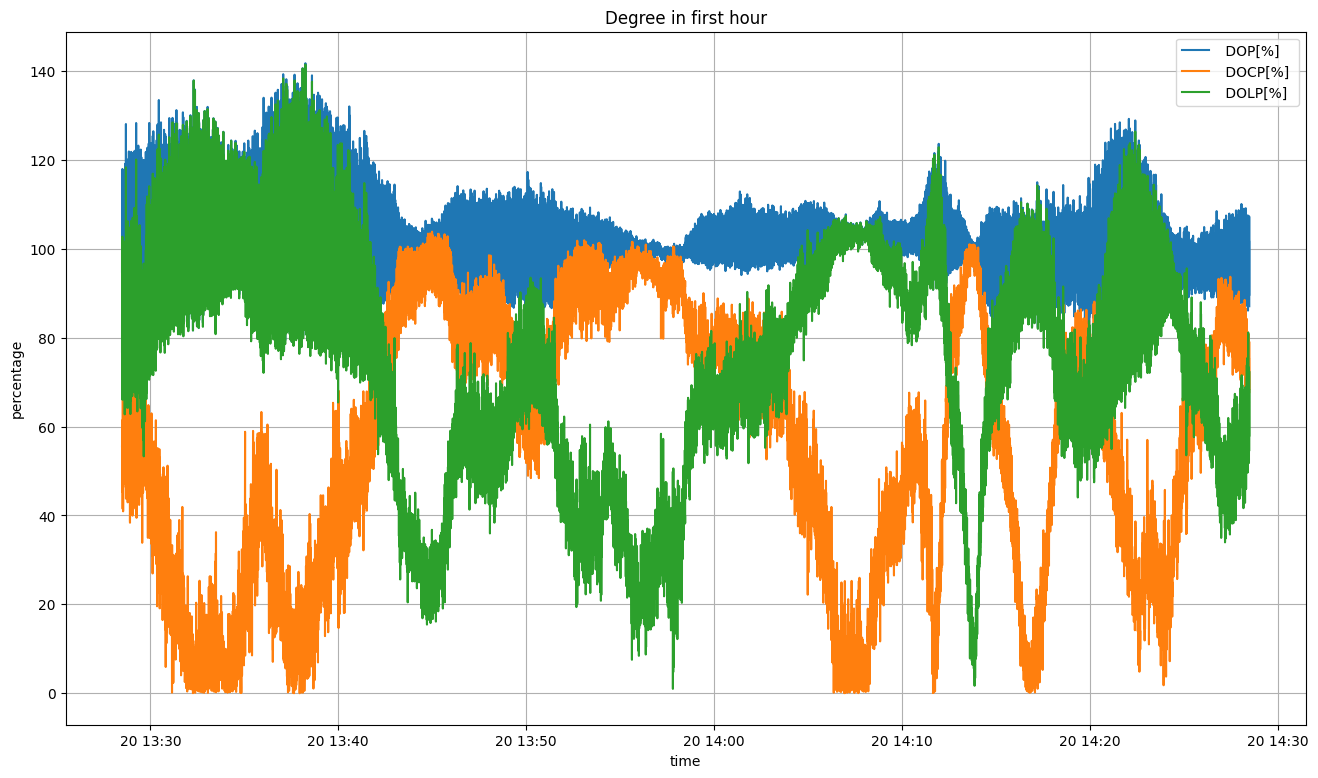

In [36]:
plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[11]], label = columns[11])
plt.plot(first_hour.index, first_hour[columns[12]], label = columns[12])
plt.plot(first_hour.index, first_hour[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree in first hour')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

In [37]:
first_day = degree.loc[(degree.index >= start_time) & (degree.index < end_time_day)]
first_day

DOP[%]   DOCP[%]   DOLP[%] 
Time[date hh:mm:ss]                                 
2025-02-20 13:28:29.460    94.85     55.56     76.88
2025-02-20 13:28:29.710   117.26     56.83    102.57
2025-02-20 13:28:29.960   113.20     51.90    100.60
2025-02-20 13:28:30.200    92.12     45.25     80.25
2025-02-20 13:28:30.450   111.18     61.43     92.67
...                          ...       ...       ...
2025-02-21 13:28:28.380   100.21     85.36     52.49
2025-02-21 13:28:28.640    99.52     83.11     54.74
2025-02-21 13:28:28.890   100.85     86.56     51.75
2025-02-21 13:28:29.150    99.57     86.41     49.48
2025-02-21 13:28:29.410    99.67     82.44     56.02

[338325 rows x 3 columns]

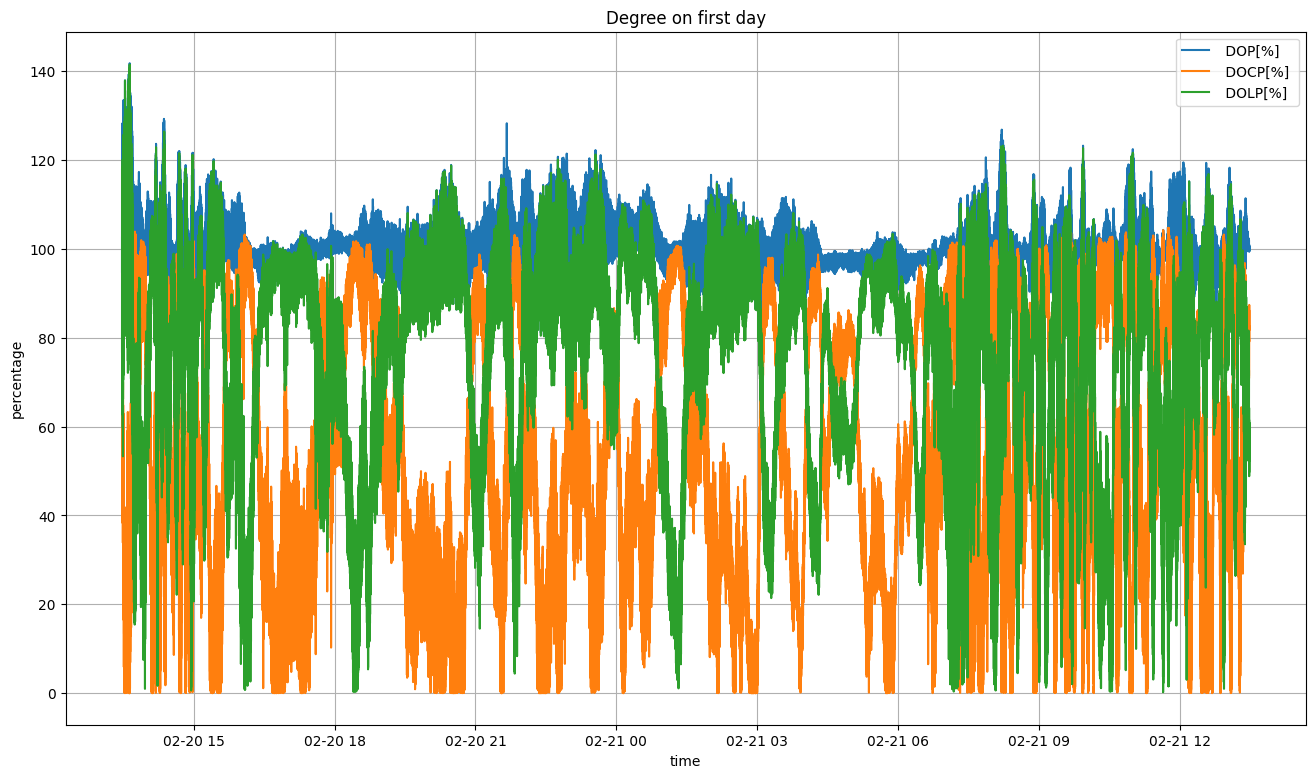

In [38]:
plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[11]], label = columns[11])
plt.plot(first_day.index, first_day[columns[12]], label = columns[12])
plt.plot(first_day.index, first_day[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Degree on first day')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

In [39]:
degree_seconds_resample = degree.resample('s').mean()
degree_seconds_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604811 entries, 2025-02-20 13:28:29 to 2025-02-27 13:28:39
Freq: s
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0    DOP[%]    604811 non-null  float64
 1    DOCP[%]   604811 non-null  float64
 2    DOLP[%]   604811 non-null  float64
dtypes: float64(3)
memory usage: 18.5 MB


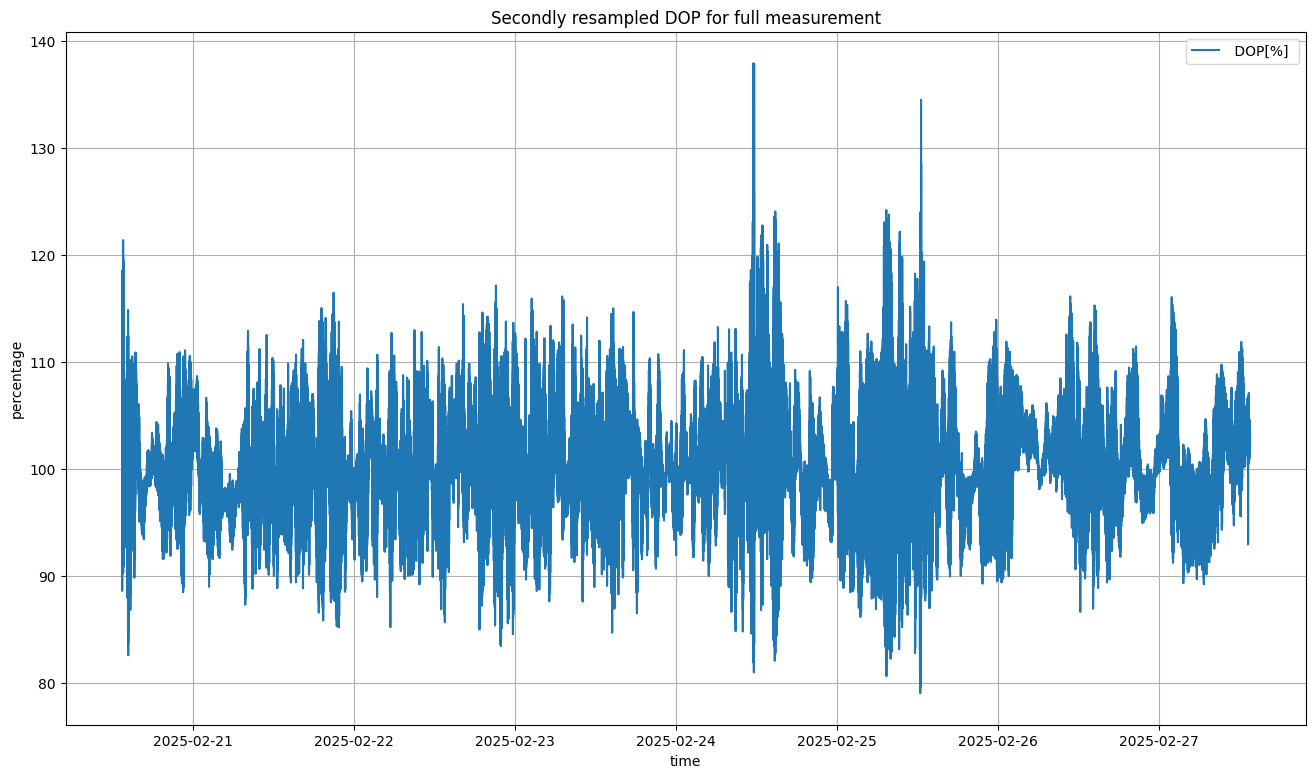

In [40]:
plt.figure(figsize = (16,9))
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[11]], label = columns[11])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled DOP for full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

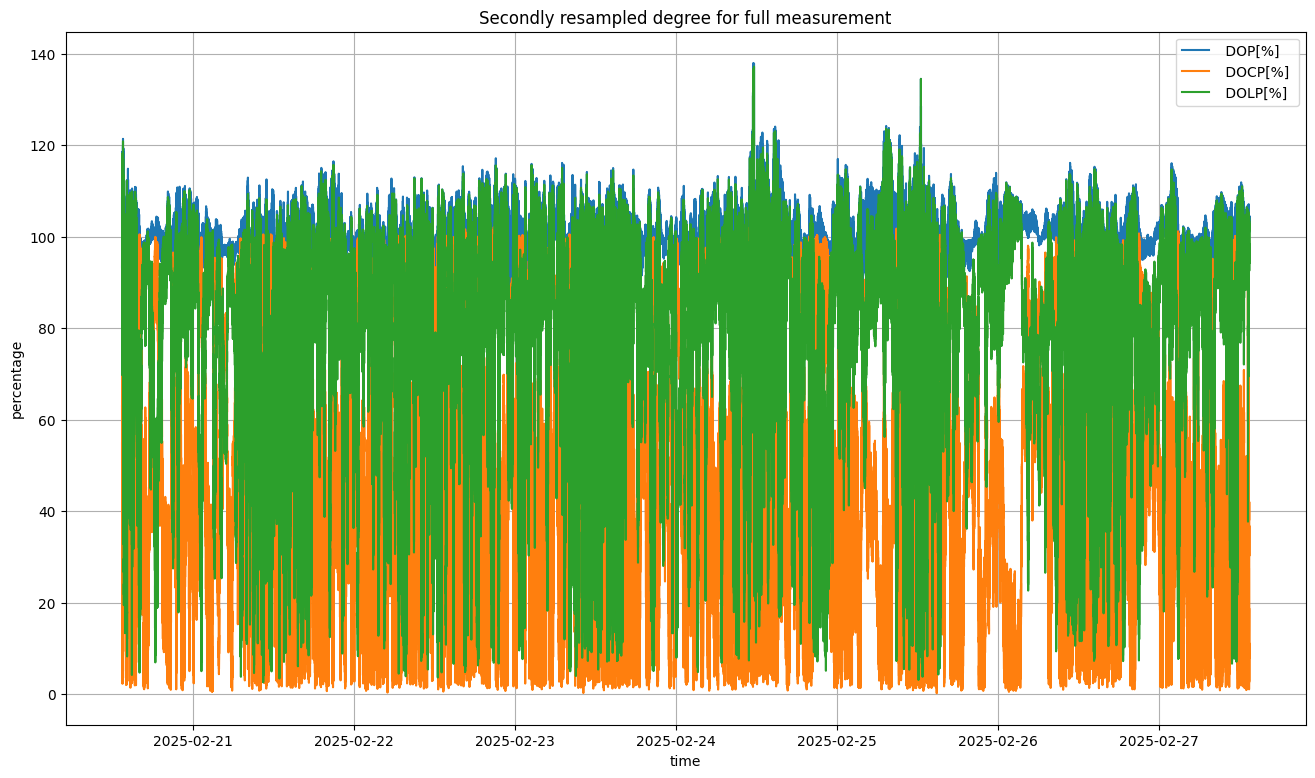

In [41]:
plt.figure(figsize = (16,9))
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[11]], label = columns[11])
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[12]], label = columns[12])
plt.plot(degree_seconds_resample.index, degree_seconds_resample[columns[13]], label = columns[13])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled degree for full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

## Energie (Power, Pol Power, Unipol Power [mW/dBm])

In [42]:
power_mw = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[14], columns[15], columns[16]], sep=sep)

In [43]:
power_mw[columns[0]] = pd.to_datetime(power_mw[columns[0]])
power_mw.set_index(columns[0], inplace=True)

In [44]:
power_mw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0    Power[mW]         float64
 1    Pol Power[mW]     float64
 2    Unpol Power[mW]   float64
dtypes: float64(3)
memory usage: 72.3 MB


In [45]:
power_mw.isnull().sum()

Power[mW]           0
Pol Power[mW]       0
Unpol Power[mW]     0
dtype: int64

In [46]:
power_mw.describe()

Power[mW]   Pol Power[mW]   Unpol Power[mW] 
count  2.369654e+06    2.369654e+06      2.369654e+06
mean   1.853396e-01    1.850686e-01      2.709176e-04
std    9.411575e-03    8.015791e-03      1.166701e-02
min    9.761000e-02    1.111000e-01     -1.006000e-01
25%    1.791000e-01    1.800000e-01     -5.437000e-03
50%    1.849000e-01    1.842000e-01      4.901000e-04
75%    1.914000e-01    1.898000e-01      5.802000e-03
max    2.415000e-01    2.417000e-01      9.792000e-02

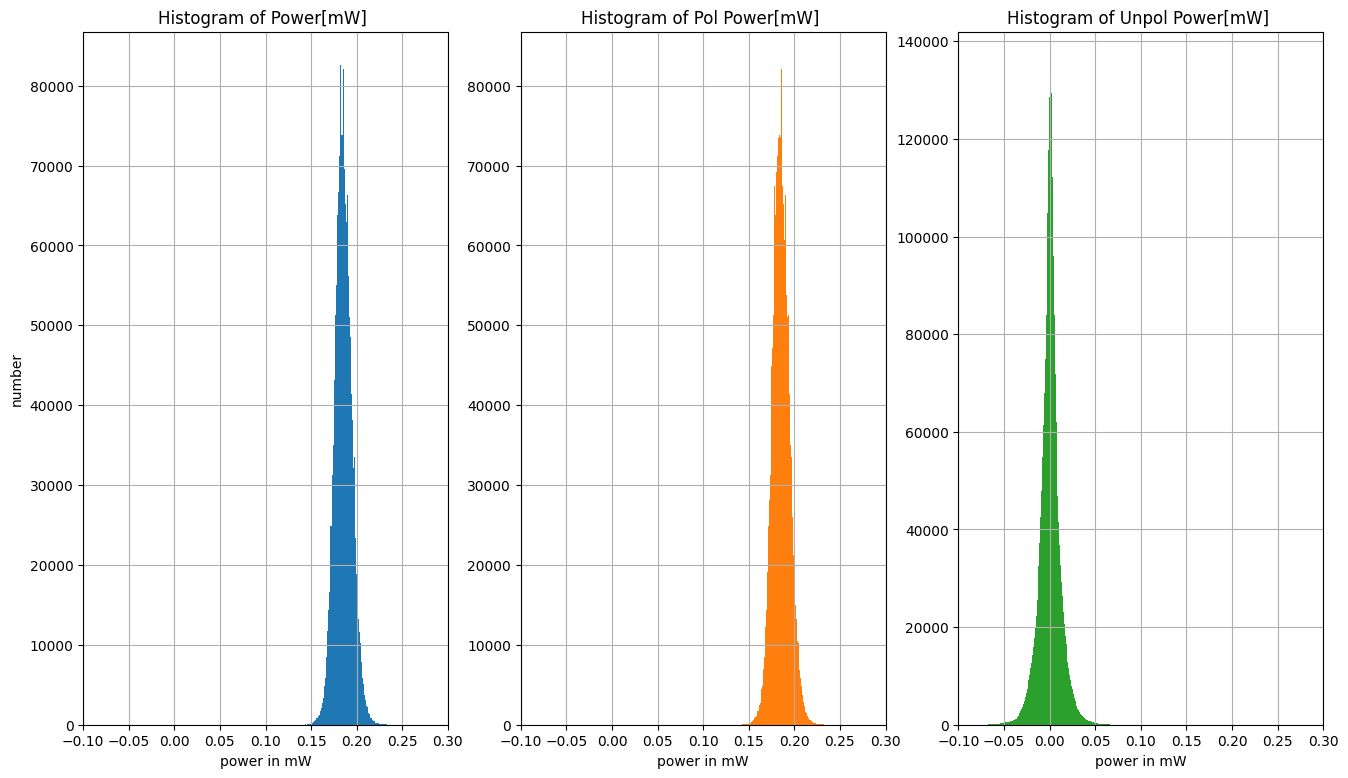

In [47]:
plt.figure(figsize = (16,9))
plt.subplot(1, 3, 1)
plt.hist(power_mw[columns[14]], bins=200, color='tab:blue')
plt.xlim([-0.1, 0.3])
plt.grid()
plt.xlabel('power in mW')
plt.ylabel('number') 
plt.title('Histogram of Power[mW] ')

plt.subplot(1, 3, 2)
plt.hist(power_mw[columns[14]], bins=200, color='tab:orange')
plt.xlim([-0.1, 0.3])
plt.grid()
plt.xlabel('power in mW')
plt.title('Histogram of Pol Power[mW] ')

plt.subplot(1, 3, 3)
plt.hist(power_mw[' Unpol Power[mW] '], bins=200, color='tab:green')
plt.xlim([-0.1, 0.3])
plt.grid()
plt.xlabel('power in mW')
plt.title('Histogram of Unpol Power[mW] ')

plt.show()

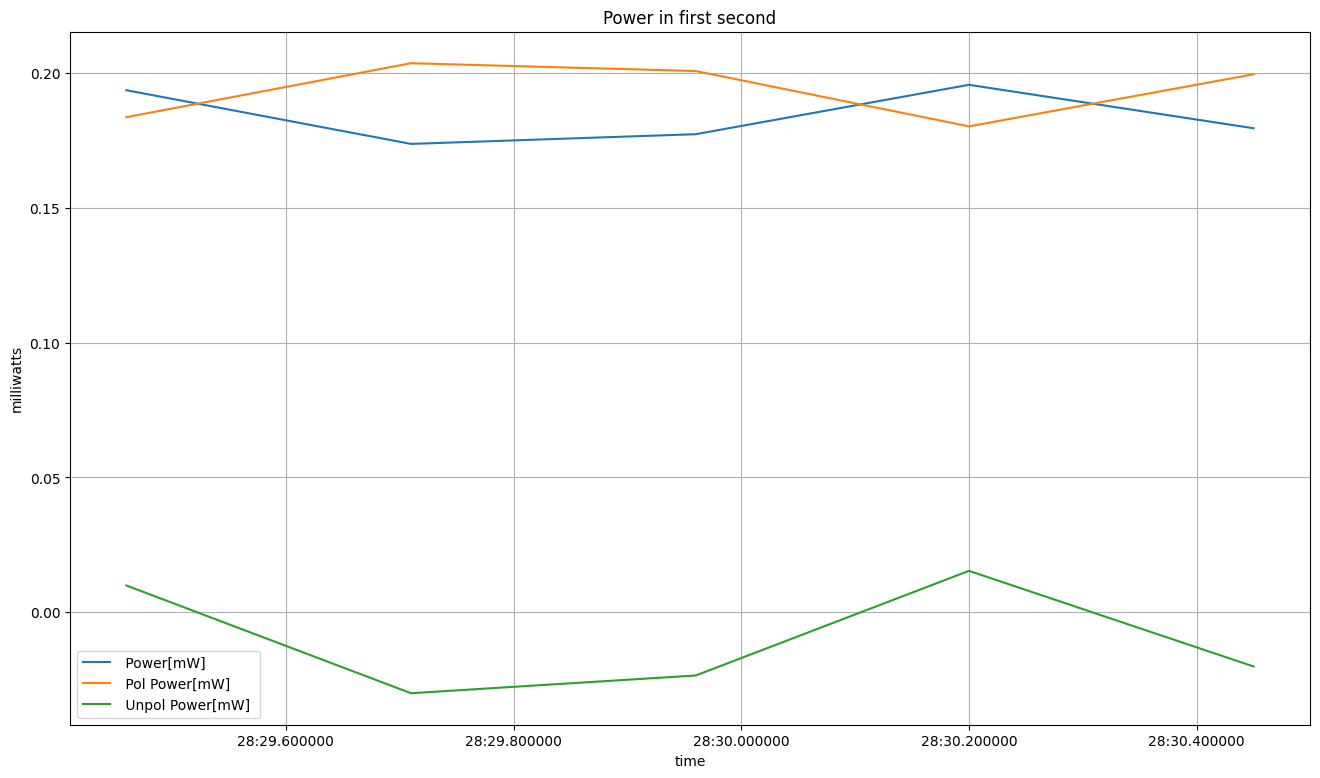

In [48]:
first_second = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[14]], label = columns[14])
plt.plot(first_second.index, first_second[columns[15]], label = columns[15])
plt.plot(first_second.index, first_second[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first second')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

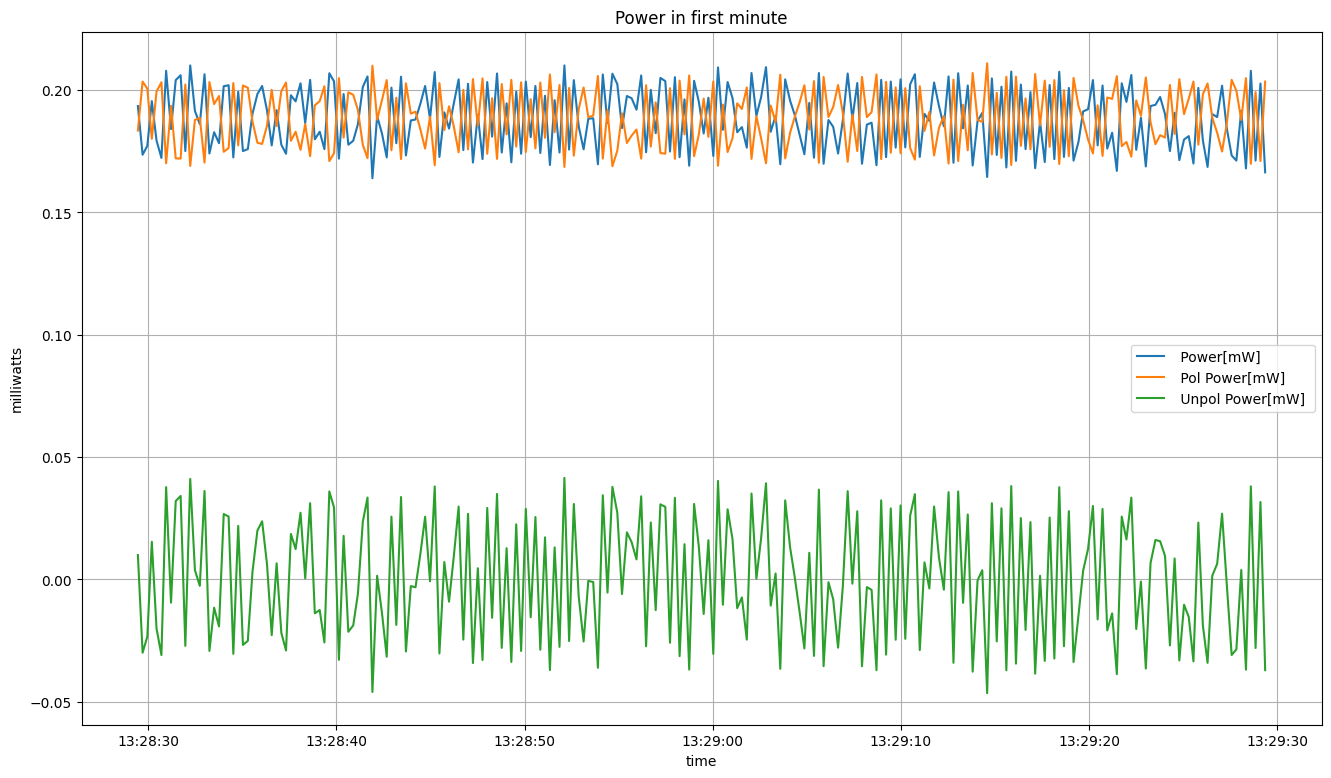

In [49]:
first_minute = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[14]], label = columns[14])
plt.plot(first_minute.index, first_minute[columns[15]], label = columns[15])
plt.plot(first_minute.index, first_minute[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first minute')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

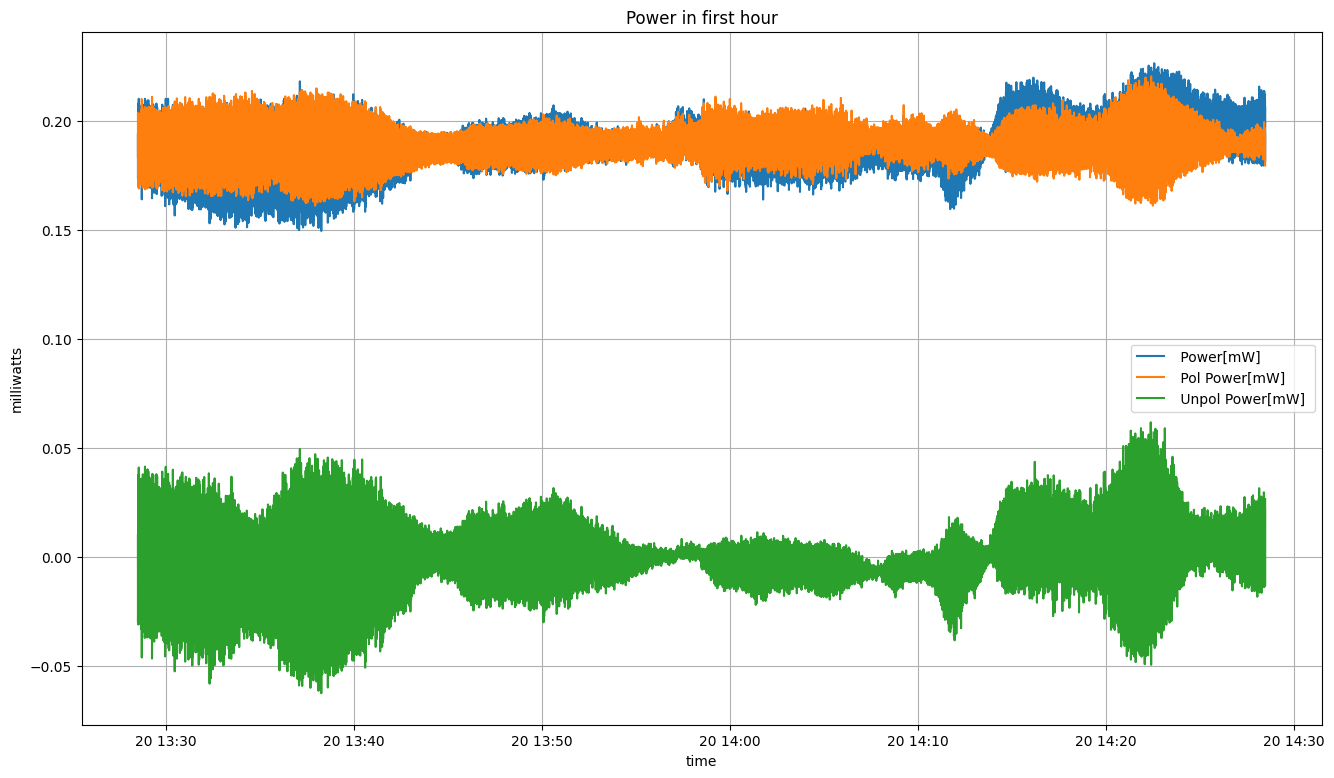

In [50]:
first_hour = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[14]], label = columns[14])
plt.plot(first_hour.index, first_hour[columns[15]], label = columns[15])
plt.plot(first_hour.index, first_hour[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first hour')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

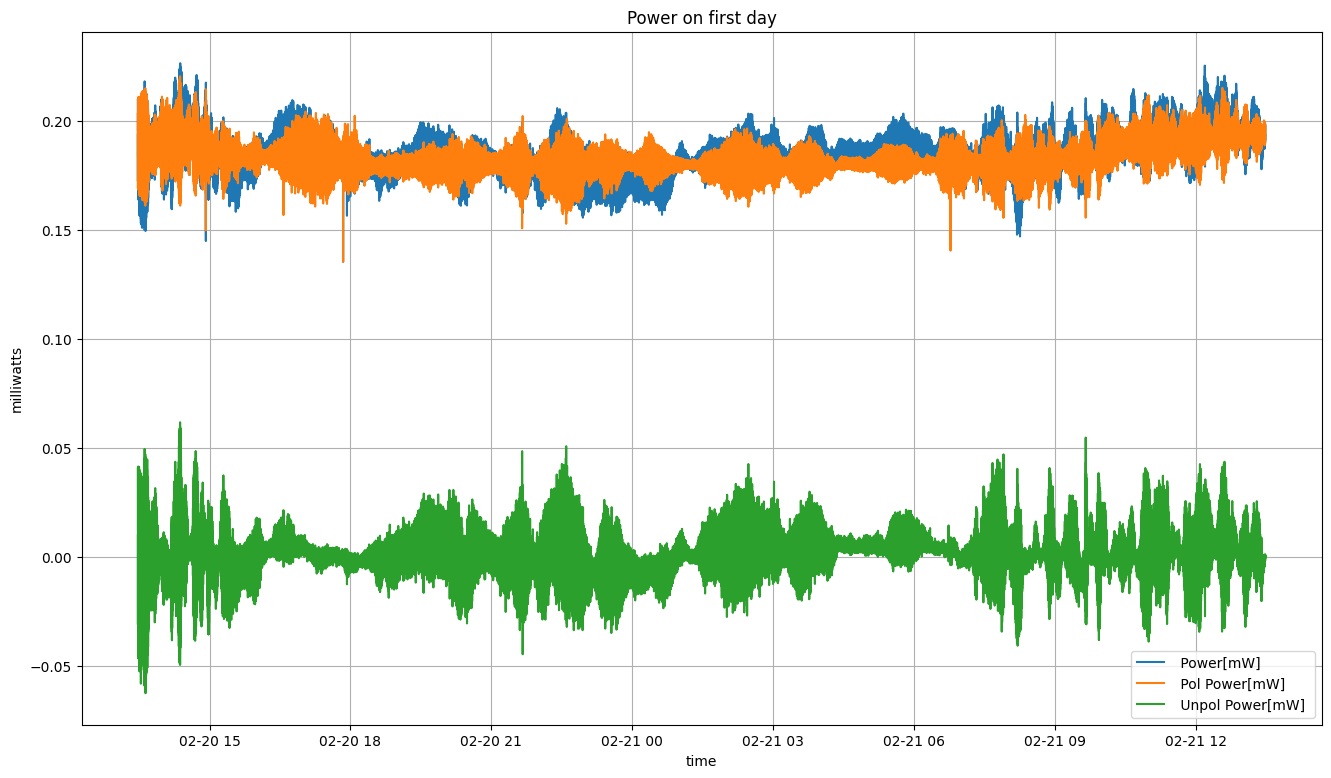

In [51]:
first_day = power_mw.loc[(power_mw.index >= start_time) & (power_mw.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[14]], label = columns[14])
plt.plot(first_day.index, first_day[columns[15]], label = columns[15])
plt.plot(first_day.index, first_day[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power on first day')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

In [52]:
power_mw_seconds_resample = power_mw.resample('s').mean()
power_mw_seconds_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604811 entries, 2025-02-20 13:28:29 to 2025-02-27 13:28:39
Freq: s
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0    Power[mW]         604811 non-null  float64
 1    Pol Power[mW]     604811 non-null  float64
 2    Unpol Power[mW]   604811 non-null  float64
dtypes: float64(3)
memory usage: 18.5 MB


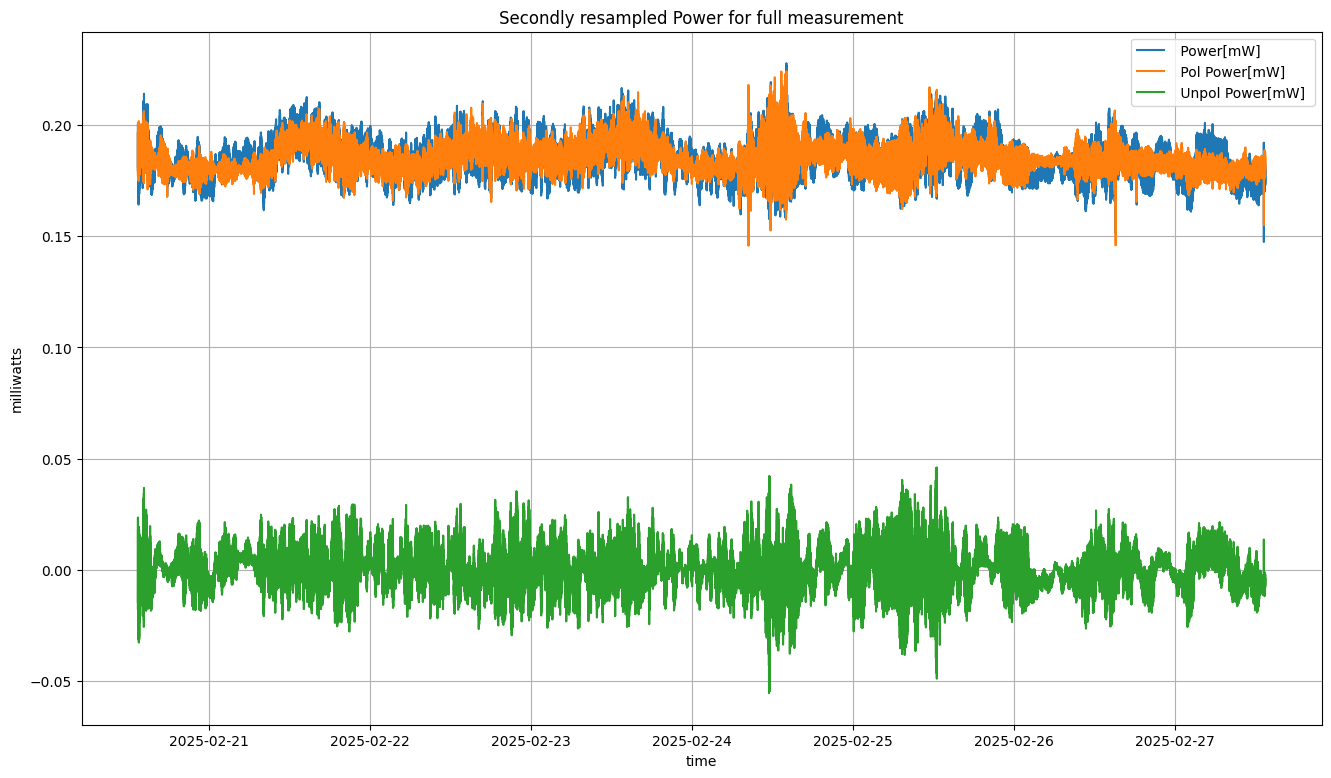

In [53]:
plt.figure(figsize = (16,9))
plt.plot(power_mw_seconds_resample.index, power_mw_seconds_resample[columns[14]], label = columns[14])
plt.plot(power_mw_seconds_resample.index, power_mw_seconds_resample[columns[15]], label = columns[15])
plt.plot(power_mw_seconds_resample.index, power_mw_seconds_resample[columns[16]], label = columns[16])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled Power for full measurement')
plt.xlabel('time')
plt.ylabel('milliwatts')
plt.show()

In [54]:
power_dbm = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[17], columns[18], columns[19]], sep=sep)

In [55]:
power_dbm[columns[0]] = pd.to_datetime(power_dbm[columns[0]])
power_dbm.set_index(columns[0], inplace=True)

In [56]:
power_dbm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 3 columns):
 #   Column              Dtype  
---  ------              -----  
 0    Power[dBm]         float64
 1    Pol Power[dBm]     float64
 2    Unpol Power[dBm]   float64
dtypes: float64(3)
memory usage: 72.3 MB


In [57]:
power_dbm.isnull().sum()

Power[dBm]           0
Pol Power[dBm]       0
Unpol Power[dBm]     0
dtype: int64

In [58]:
power_dbm.describe()

Power[dBm]   Pol Power[dBm]   Unpol Power[dBm] 
count  2.369654e+06     2.369654e+06       2.369654e+06
mean  -7.325910e+00    -7.330714e+00      -5.963221e+01
std    2.203316e-01     1.870446e-01       3.844336e+01
min   -1.010500e+01    -9.542000e+00      -9.999000e+01
25%   -7.469000e+00    -7.447000e+00      -9.999000e+01
50%   -7.330000e+00    -7.347000e+00      -3.309700e+01
75%   -7.181000e+00    -7.218000e+00      -2.236400e+01
max   -6.171000e+00    -6.168000e+00      -1.009200e+01

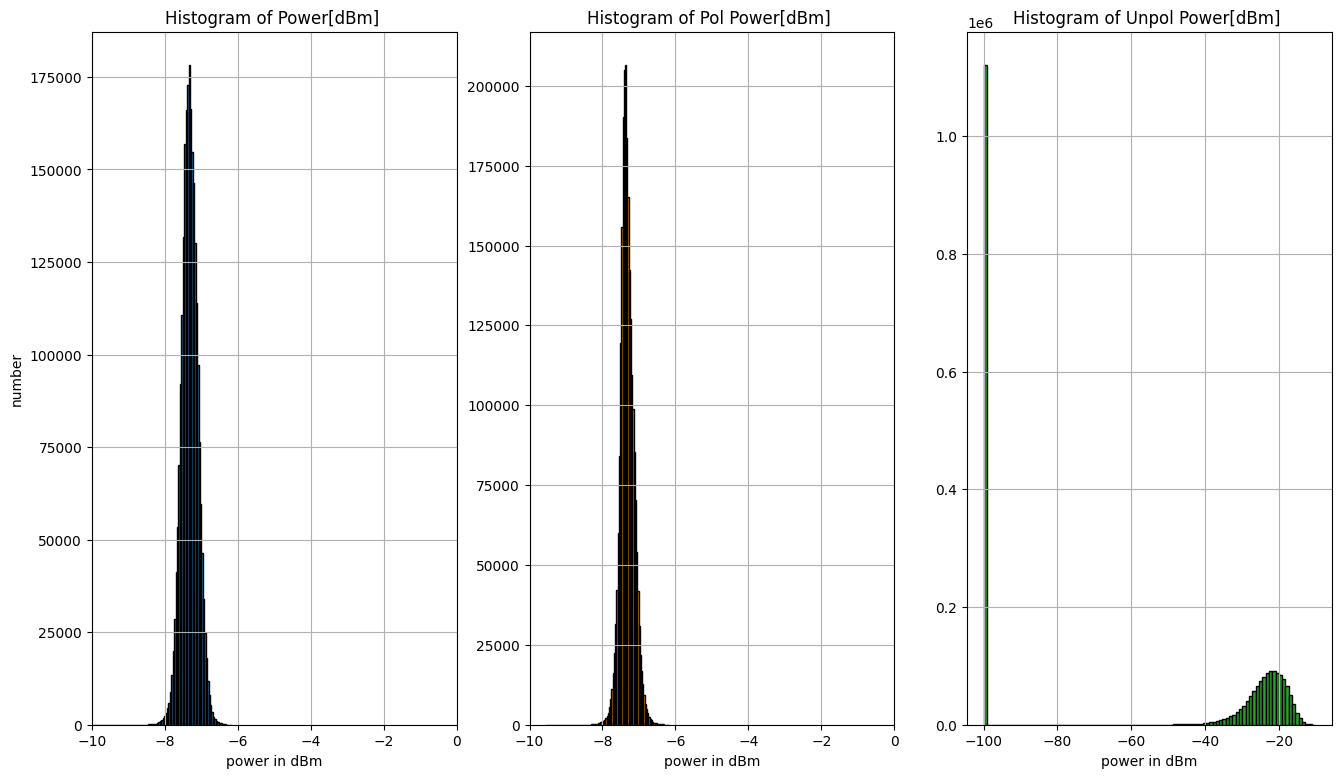

In [59]:
plt.figure(figsize = (16,9))
plt.subplot(1, 3, 1)
plt.hist(power_dbm[columns[17]], bins=100, color='tab:blue', edgecolor='black')
plt.xlim([-10, 0])
plt.grid()
plt.xlabel('power in dBm')
plt.ylabel('number') 
plt.title('Histogram of Power[dBm] ')

plt.subplot(1, 3, 2)
plt.hist(power_dbm[columns[18]], bins=100, color='tab:orange', edgecolor='black')
plt.xlim([-10, 0])
plt.grid()
plt.xlabel('power in dBm')
plt.title('Histogram of Pol Power[dBm] ')

plt.subplot(1, 3, 3)
plt.hist(power_dbm[columns[19]], bins=100, color='tab:green', edgecolor='black')
plt.grid()
plt.xlabel('power in dBm')
plt.title('Histogram of Unpol Power[dBm] ')

plt.show()

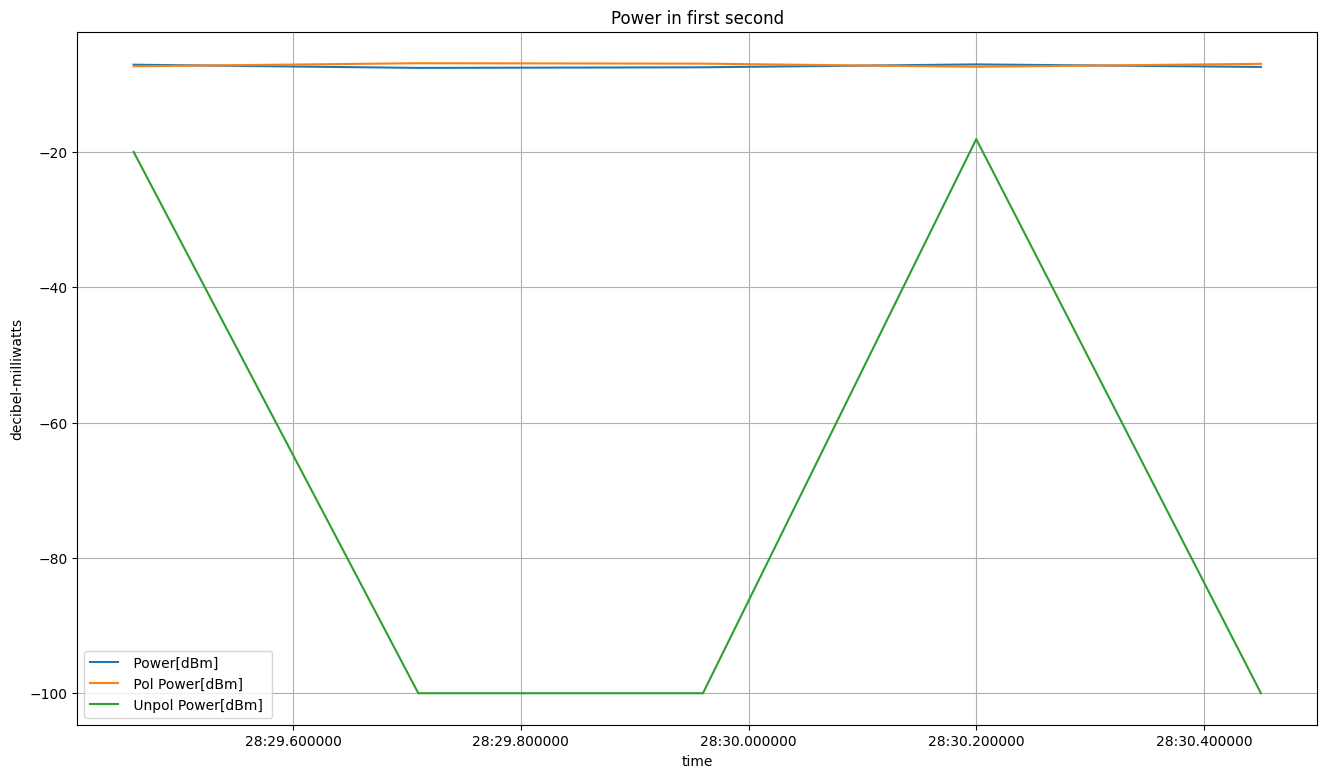

In [60]:
first_second = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[17]], label = columns[17])
plt.plot(first_second.index, first_second[columns[18]], label = columns[18])
plt.plot(first_second.index, first_second[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first second')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

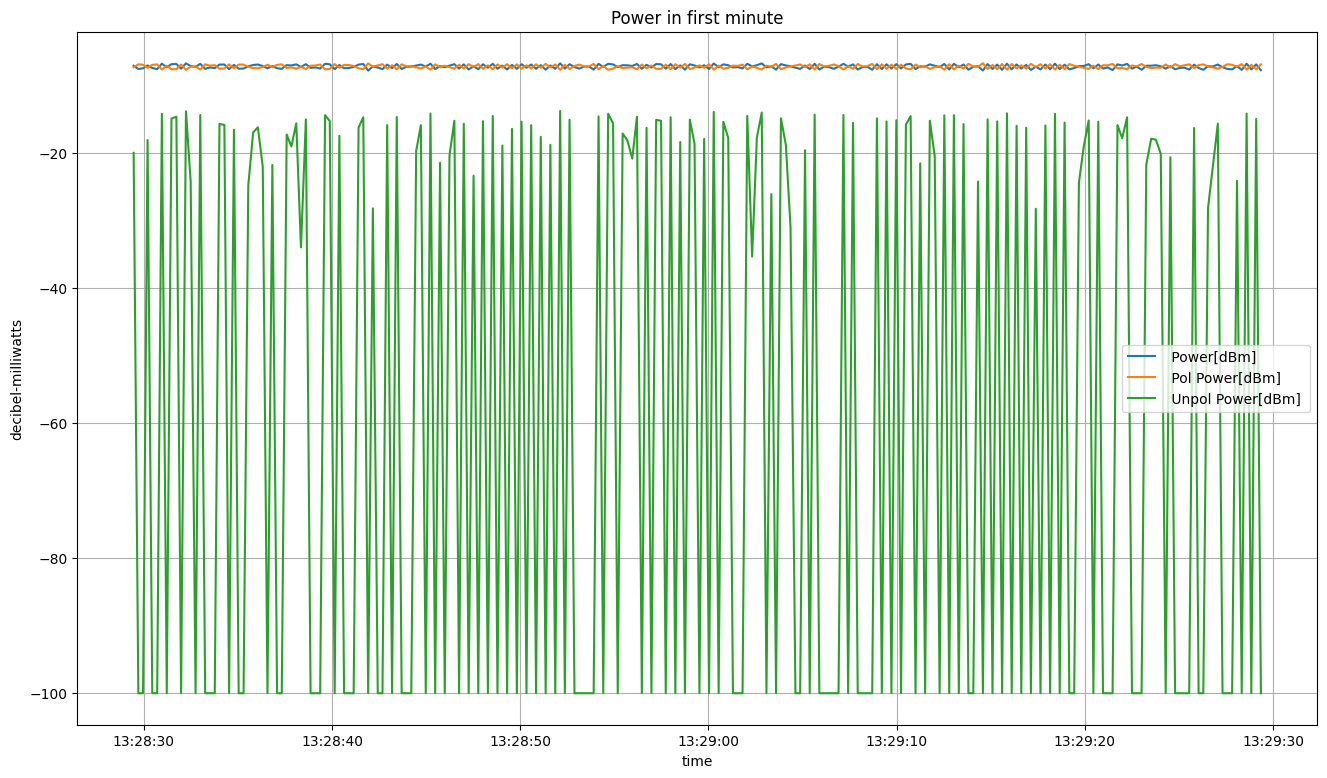

In [61]:
first_minute = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[17]], label = columns[17])
plt.plot(first_minute.index, first_minute[columns[18]], label = columns[18])
plt.plot(first_minute.index, first_minute[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first minute')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

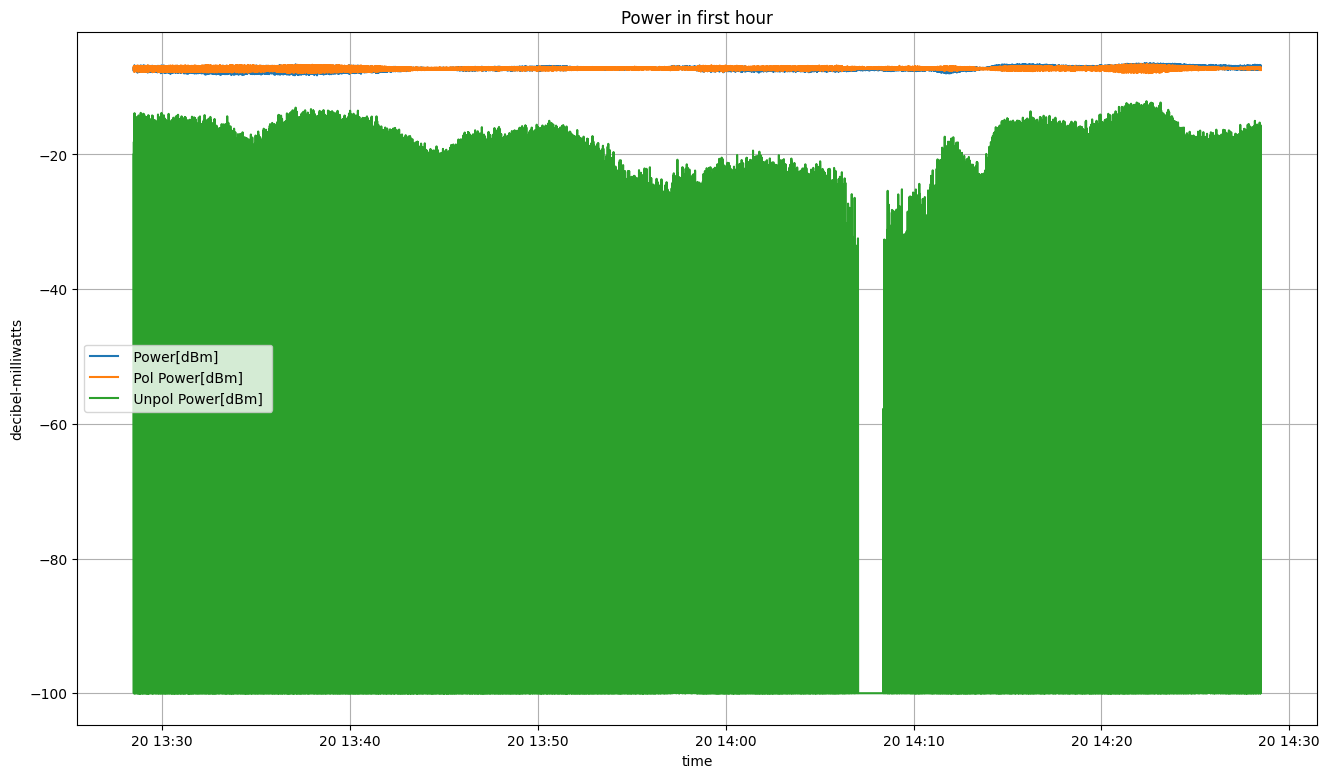

In [62]:
first_hour = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[17]], label = columns[17])
plt.plot(first_hour.index, first_hour[columns[18]], label = columns[18])
plt.plot(first_hour.index, first_hour[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power in first hour')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

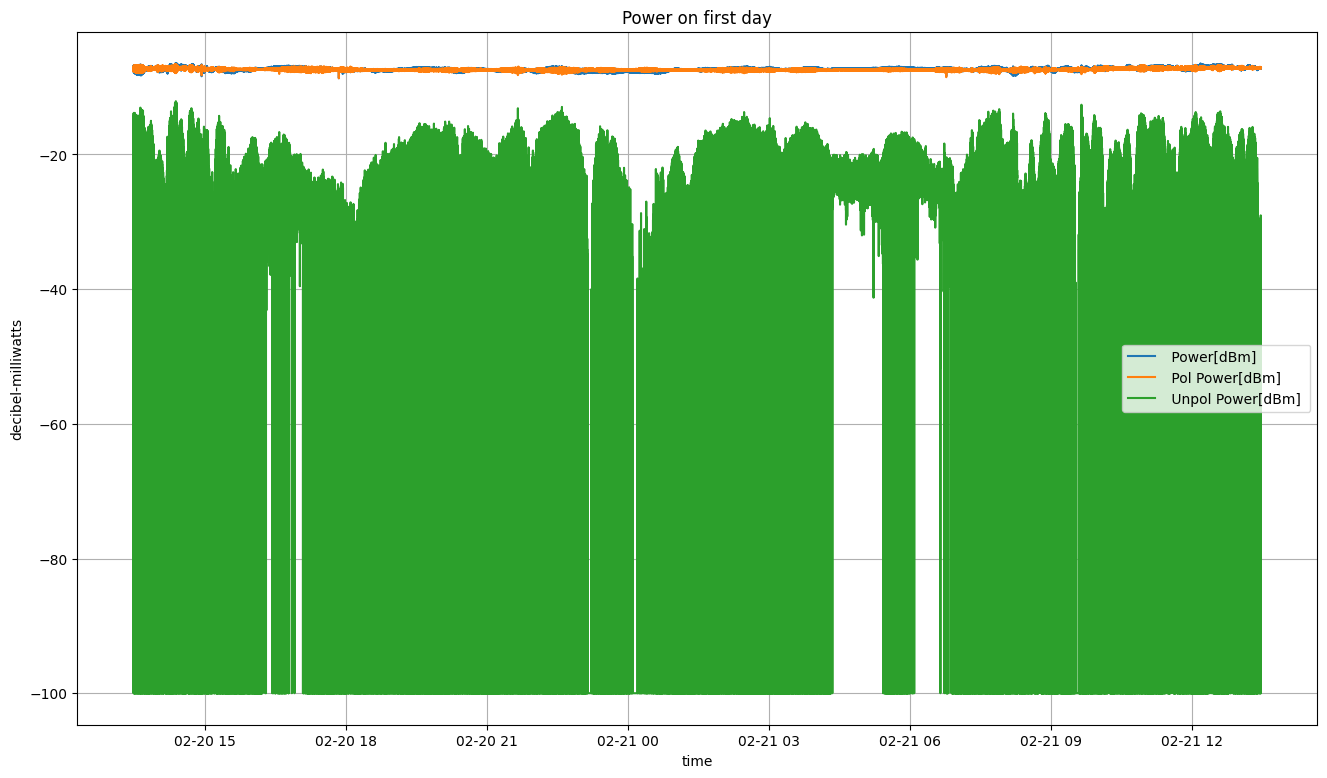

In [63]:
first_day = power_dbm.loc[(power_dbm.index >= start_time) & (power_dbm.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[17]], label = columns[17])
plt.plot(first_day.index, first_day[columns[18]], label = columns[18])
plt.plot(first_day.index, first_day[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Power on first day')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

In [64]:
power_dbm_seconds_resample = power_dbm.resample('s').mean()
power_dbm_seconds_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604811 entries, 2025-02-20 13:28:29 to 2025-02-27 13:28:39
Freq: s
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0    Power[dBm]         604811 non-null  float64
 1    Pol Power[dBm]     604811 non-null  float64
 2    Unpol Power[dBm]   604811 non-null  float64
dtypes: float64(3)
memory usage: 18.5 MB


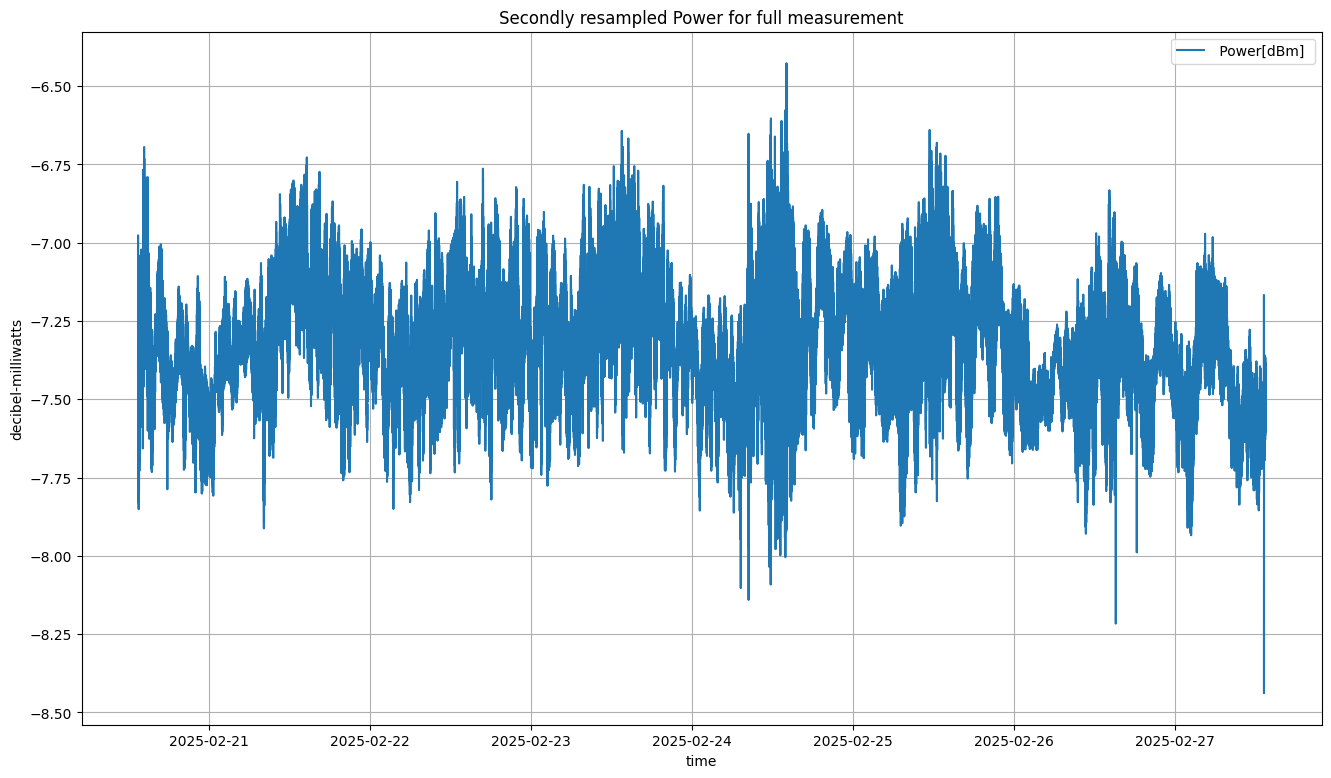

In [65]:
plt.figure(figsize = (16,9))
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[17]], label = columns[17])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled Power for full measurement')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

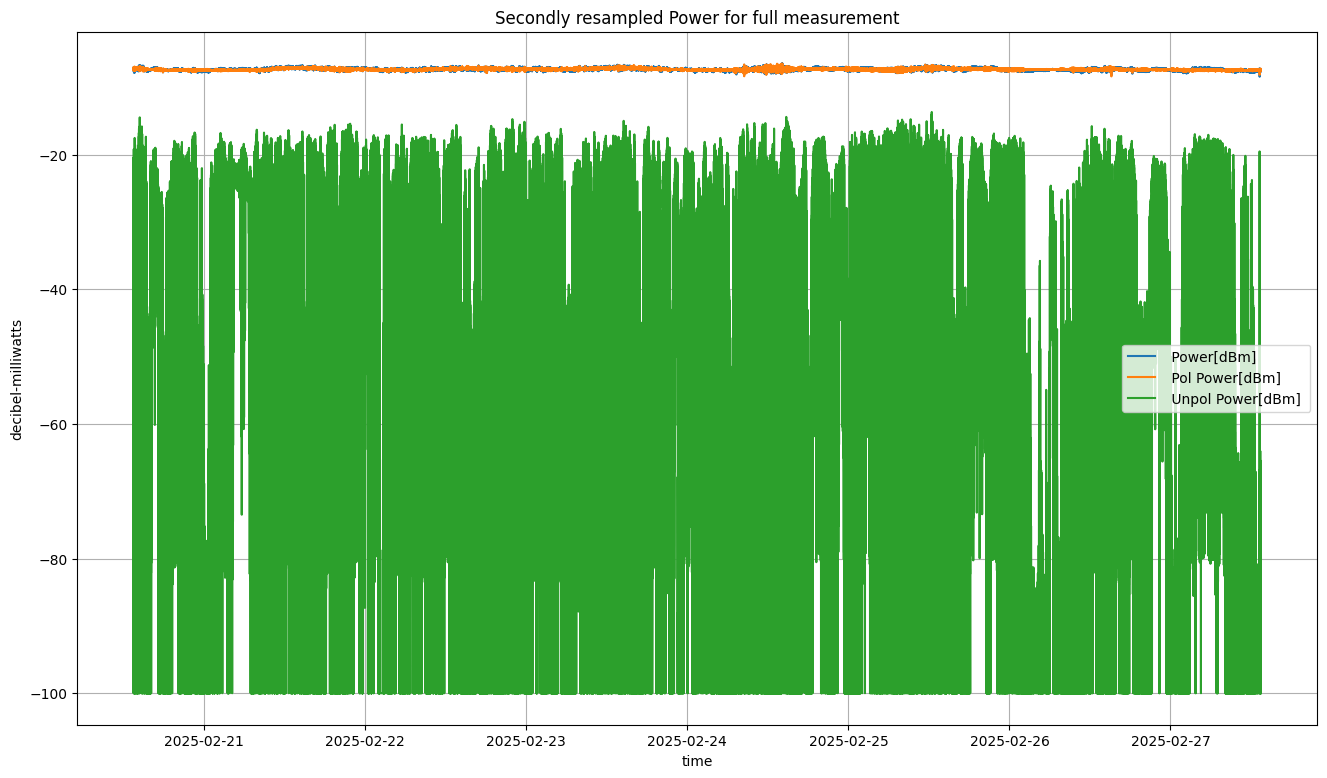

In [66]:
plt.figure(figsize = (16,9))
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[17]], label = columns[17])
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[18]], label = columns[18])
plt.plot(power_dbm_seconds_resample.index, power_dbm_seconds_resample[columns[19]], label = columns[19])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled Power for full measurement')
plt.xlabel('time')
plt.ylabel('decibel-milliwatts')
plt.show()

## Winkel (Azimuth, Ellipticity)

In [67]:
angle = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[9], columns[10]], sep=sep)

In [68]:
angle[columns[0]] = pd.to_datetime(angle[columns[0]])
angle.set_index(columns[0], inplace=True)

In [69]:
angle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0    Azimuth[°]       float64
 1    Ellipticity[°]   float64
dtypes: float64(2)
memory usage: 54.2 MB


In [70]:
angle.isnull().sum()

Azimuth[°]         0
Ellipticity[°]     0
dtype: int64

In [71]:
angle.describe()

Azimuth[°]   Ellipticity[°] 
count  2.369654e+06     2.369654e+06
mean  -2.375038e+00    -8.207911e-01
std    5.038627e+01     1.906634e+01
min   -9.000000e+01    -4.498000e+01
25%   -4.525000e+01    -1.561000e+01
50%   -9.900000e-01    -1.620000e+00
75%    3.744000e+01     1.354000e+01
max    9.000000e+01     4.497000e+01

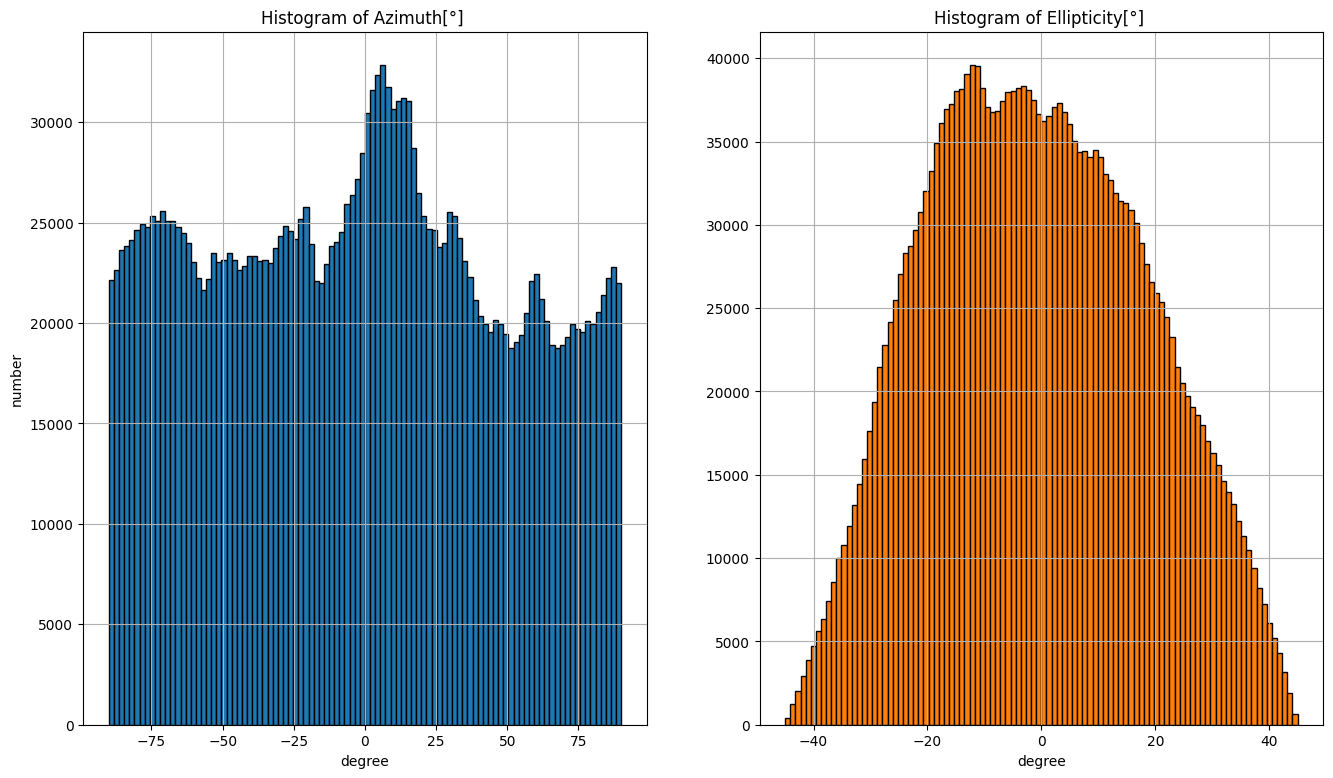

In [72]:
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(angle[columns[9]], bins=100, color='tab:blue', edgecolor='black')
plt.grid()
plt.xlabel('degree')
plt.ylabel('number') 
plt.title('Histogram of Azimuth[°] ')

plt.subplot(1, 2, 2)
plt.hist(angle[columns[10]], bins=100, color='tab:orange', edgecolor='black')
plt.grid()
plt.xlabel('degree')
plt.title('Histogram of Ellipticity[°] ')

plt.show()

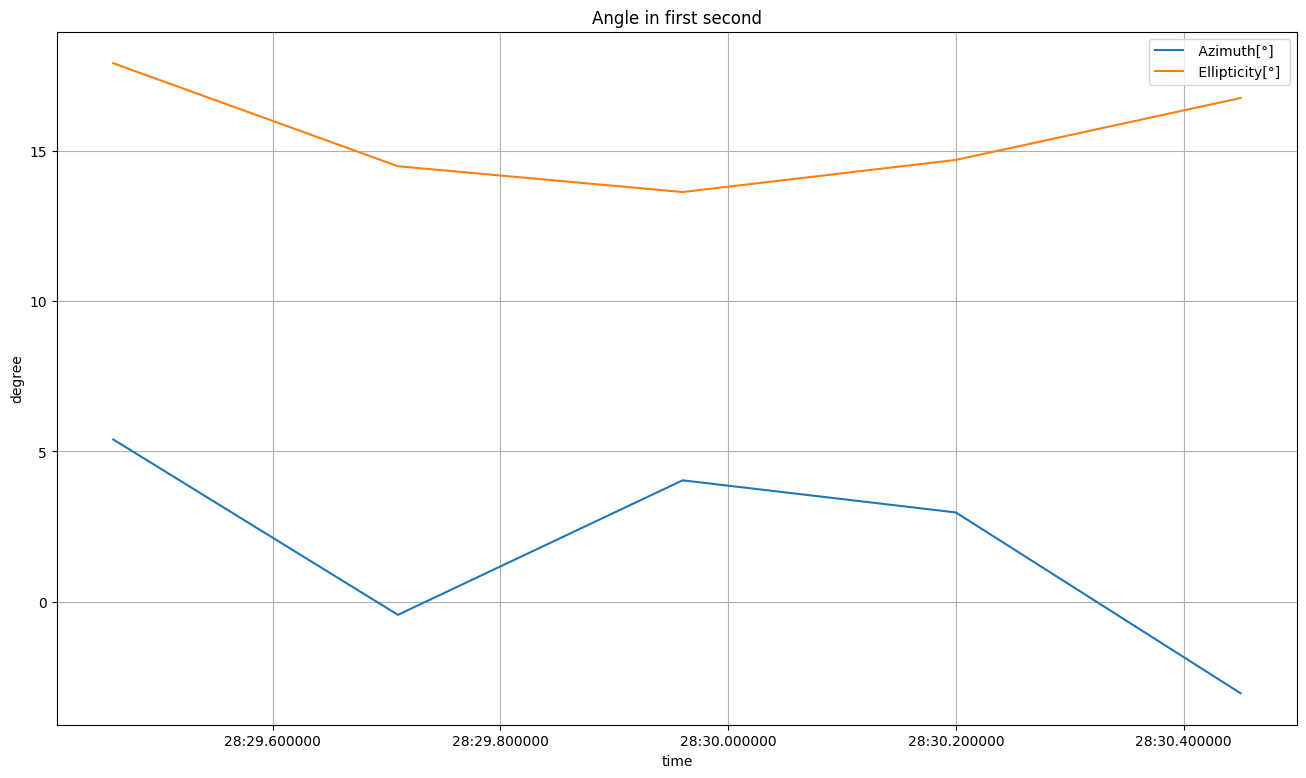

In [73]:
first_second = angle.loc[(angle.index >= start_time) & (angle.index < end_time_second)]

plt.figure(figsize = (16,9))
plt.plot(first_second.index, first_second[columns[9]], label = columns[9])
plt.plot(first_second.index, first_second[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle in first second')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

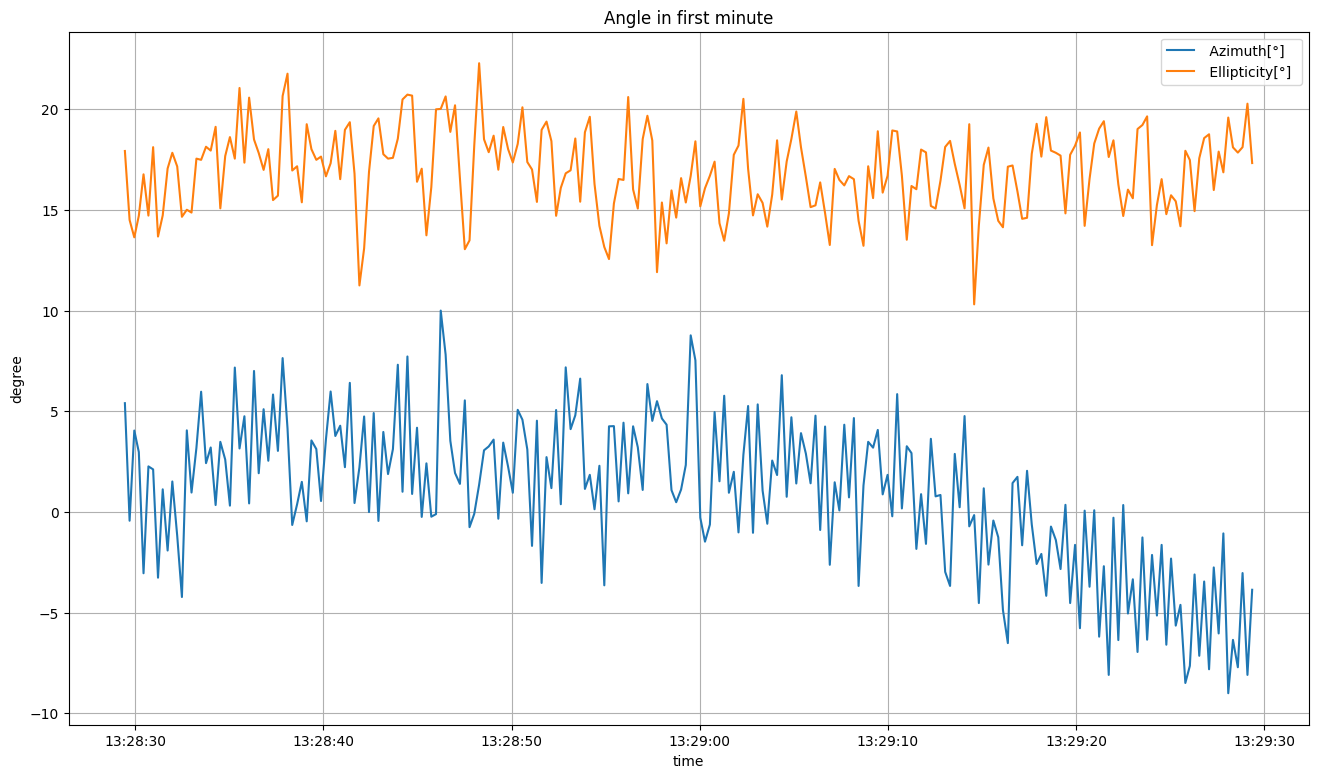

In [74]:
first_minute = angle.loc[(angle.index >= start_time) & (angle.index < end_time_minute)]

plt.figure(figsize = (16,9))
plt.plot(first_minute.index, first_minute[columns[9]], label = columns[9])
plt.plot(first_minute.index, first_minute[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle in first minute')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

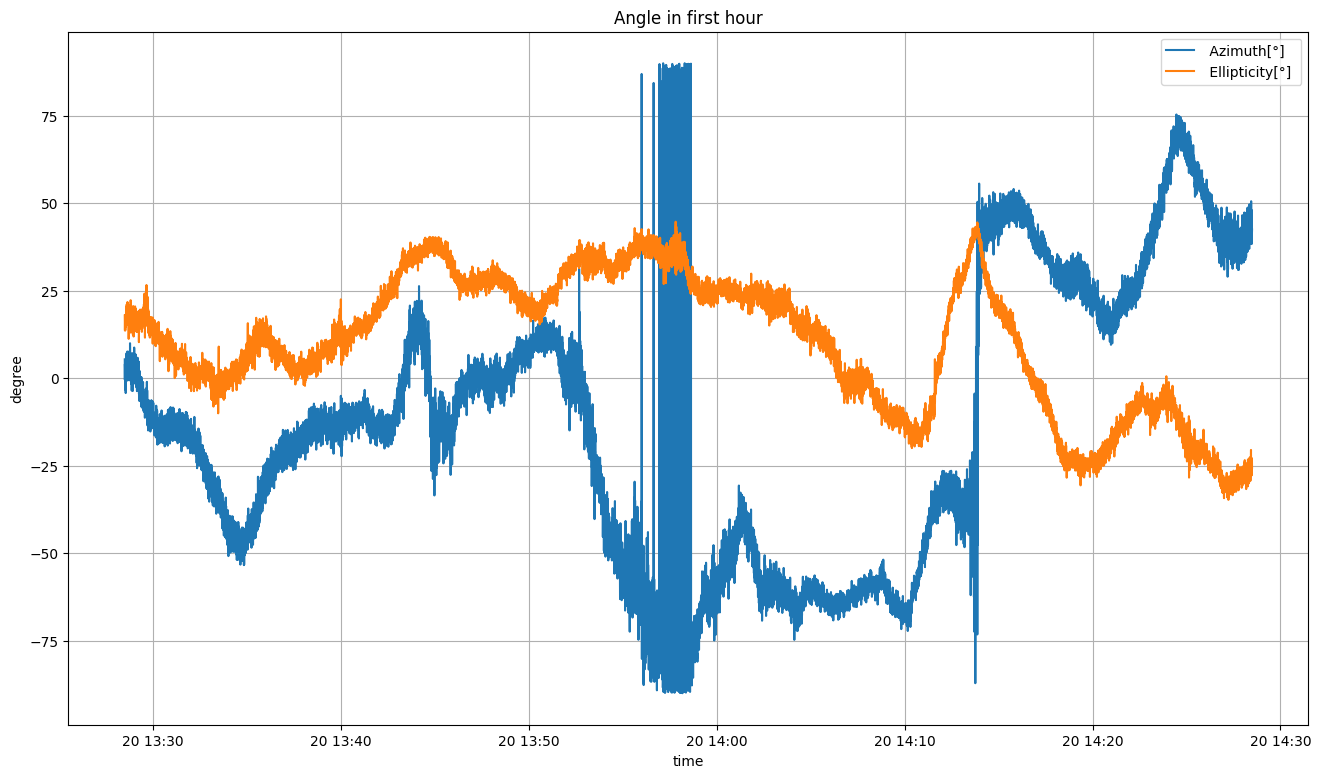

In [75]:
first_hour = angle.loc[(angle.index >= start_time) & (angle.index < end_time_hour)]

plt.figure(figsize = (16,9))
plt.plot(first_hour.index, first_hour[columns[9]], label = columns[9])
plt.plot(first_hour.index, first_hour[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle in first hour')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

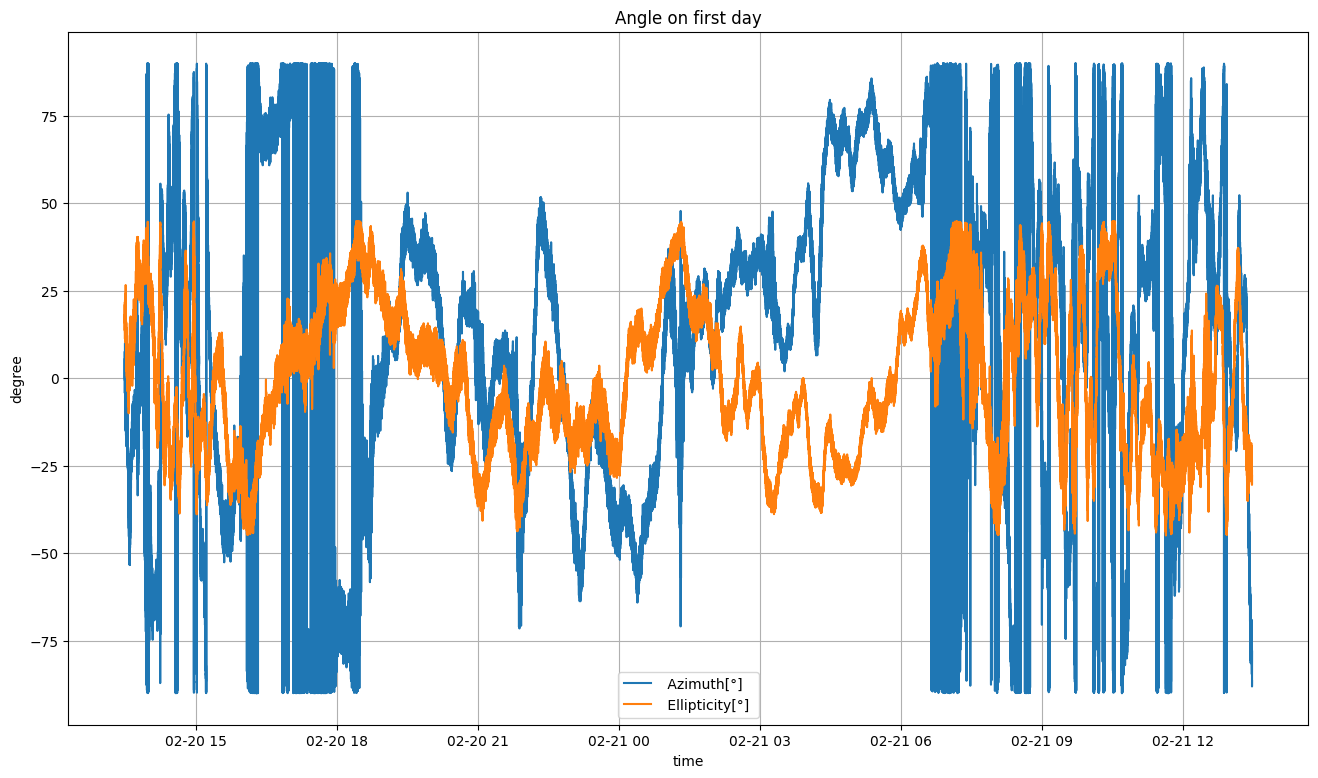

In [76]:
first_day = angle.loc[(angle.index >= start_time) & (angle.index < end_time_day)]

plt.figure(figsize = (16,9))
plt.plot(first_day.index, first_day[columns[9]], label = columns[9])
plt.plot(first_day.index, first_day[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Angle on first day')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

In [77]:
angle_seconds_resample = angle.resample('s').mean()
angle_seconds_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604811 entries, 2025-02-20 13:28:29 to 2025-02-27 13:28:39
Freq: s
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    Azimuth[°]       604811 non-null  float64
 1    Ellipticity[°]   604811 non-null  float64
dtypes: float64(2)
memory usage: 13.8 MB


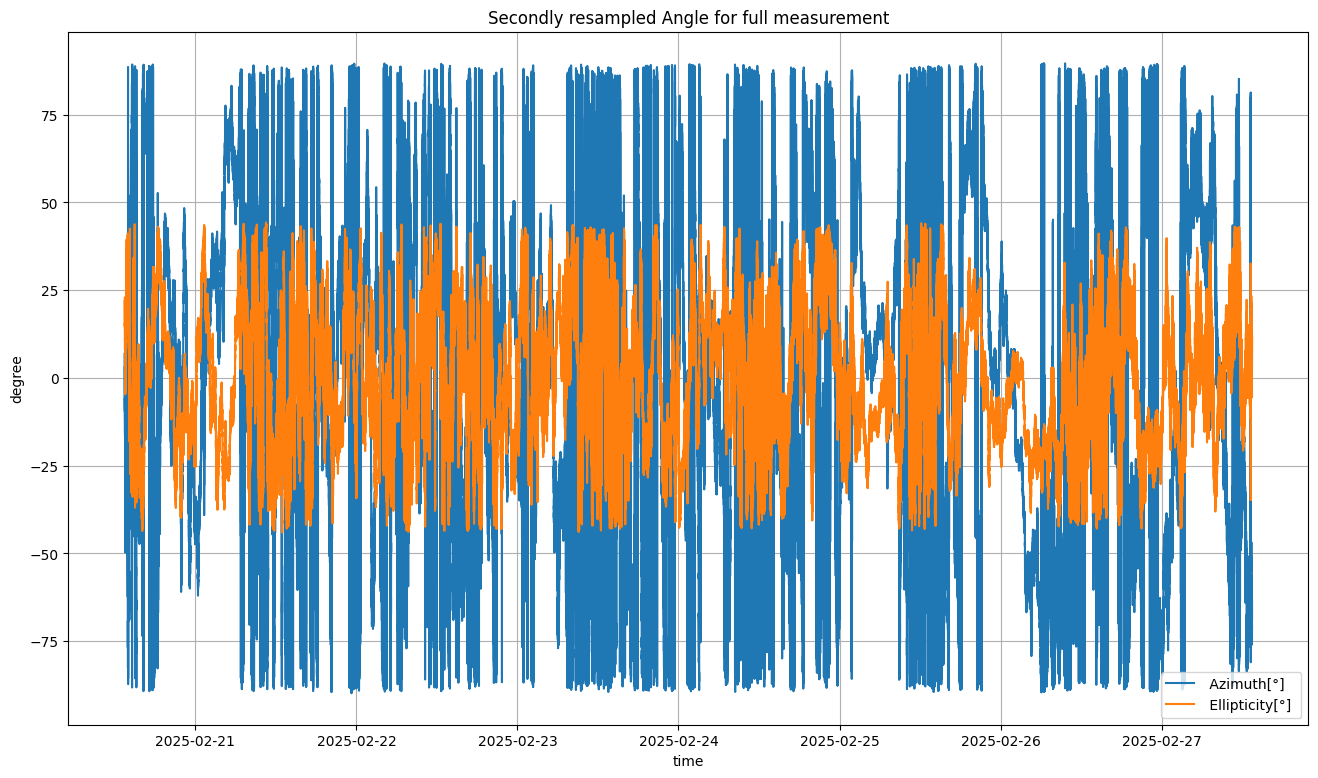

In [78]:
plt.figure(figsize = (16,9))
plt.plot(angle_seconds_resample.index, angle_seconds_resample[columns[9]], label = columns[9])
plt.plot(angle_seconds_resample.index, angle_seconds_resample[columns[10]], label = columns[10])
plt.grid()
plt.legend(loc = 'best')
plt.title('Secondly resampled Angle for full measurement')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()

## Stokes-Parameter (S0, S1, S2, S3 / Normalized S1, S2, S3)

In [79]:
stokes = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[5], columns[6], columns[7], columns[8]], sep=sep)

C:\Users\laura\AppData\Local\Temp\ipykernel_15848\3101761779.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  stokes = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[5], columns[6], columns[7], columns[8]], sep=sep)


In [80]:
stokes[columns[0]] = pd.to_datetime(stokes[columns[0]])
stokes.set_index(columns[0], inplace=True)

In [81]:
stokes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0    S 0 [mW]  object 
 1    S 1 [mW]  float64
 2    S 2 [mW]  float64
 3    S 3 [mW]  float64
dtypes: float64(3), object(1)
memory usage: 90.4+ MB


In [82]:
stokes.isnull().sum()

S 0 [mW]    0
S 1 [mW]    0
S 2 [mW]    0
S 3 [mW]    0
dtype: int64

In [83]:
stokes.describe()

S 1 [mW]      S 2 [mW]      S 3 [mW]
count  2.369654e+06  2.369654e+06  2.369654e+06
mean   1.119711e-02 -3.962398e-03 -5.020136e-03
std    1.096478e-01  1.056081e-01  1.047504e-01
min   -2.349000e-01 -2.198000e-01 -2.017000e-01
25%   -8.511000e-02 -9.668000e-02 -9.554000e-02
50%    1.477000e-02 -2.372500e-03 -1.044000e-02
75%    1.104000e-01  8.352000e-02  8.420000e-02
max    2.405000e-01  2.174000e-01  2.031000e-01

In [84]:
normalized_stokes = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[2], columns[3], columns[4]], sep=sep)

In [85]:
normalized_stokes[columns[0]] = pd.to_datetime(normalized_stokes[columns[0]])
normalized_stokes.set_index(columns[0], inplace=True)

In [86]:
normalized_stokes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0    Normalized s 1   float64
 1    Normalized s 2   float64
 2    Normalized s 3   float64
dtypes: float64(3)
memory usage: 72.3 MB


In [87]:
normalized_stokes.isnull().sum()

Normalized s 1     0
Normalized s 2     0
Normalized s 3     0
dtype: int64

In [88]:
normalized_stokes.describe()

Normalized s 1   Normalized s 2   Normalized s 3 
count     2.369654e+06     2.369654e+06     2.369654e+06
mean      6.296412e-02    -1.947966e-02    -2.810160e-02
std       5.914234e-01     5.698981e-01     5.659980e-01
min      -1.000000e+00    -1.000000e+00    -1.000000e+00
25%      -4.600000e-01    -5.200000e-01    -5.200000e-01
50%       8.000000e-02    -1.000000e-02    -6.000000e-02
75%       6.000000e-01     4.500000e-01     4.600000e-01
max       1.000000e+00     1.000000e+00     1.000000e+00

## Power-Split-Ratio & Phase Difference

In [89]:
modality = pd.read_csv(filename,skiprows=skip, usecols=[columns[0], columns[20], columns[21]], sep=sep)

In [90]:
modality[columns[0]] = pd.to_datetime(modality[columns[0]])
modality.set_index(columns[0], inplace=True)

In [91]:
modality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369654 entries, 2025-02-20 13:28:29.460000 to 2025-02-27 13:28:39.060000
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0    Power-Split-Ratio     float64
 1    Phase Difference[°]   float64
dtypes: float64(2)
memory usage: 54.2 MB


In [92]:
modality.isnull().sum()

Power-Split-Ratio       0
Phase Difference[°]     0
dtype: int64

In [93]:
modality.describe()

Power-Split-Ratio   Phase Difference[°] 
count        2.369654e+06          2.369654e+06
mean         5.314885e-01         -3.031721e+00
std          2.957300e-01          1.053810e+02
min          0.000000e+00         -1.800000e+02
25%          2.700000e-01         -9.181000e+01
50%          5.400000e-01         -1.049000e+01
75%          8.000000e-01          9.062000e+01
max          1.000000e+00          1.800000e+02

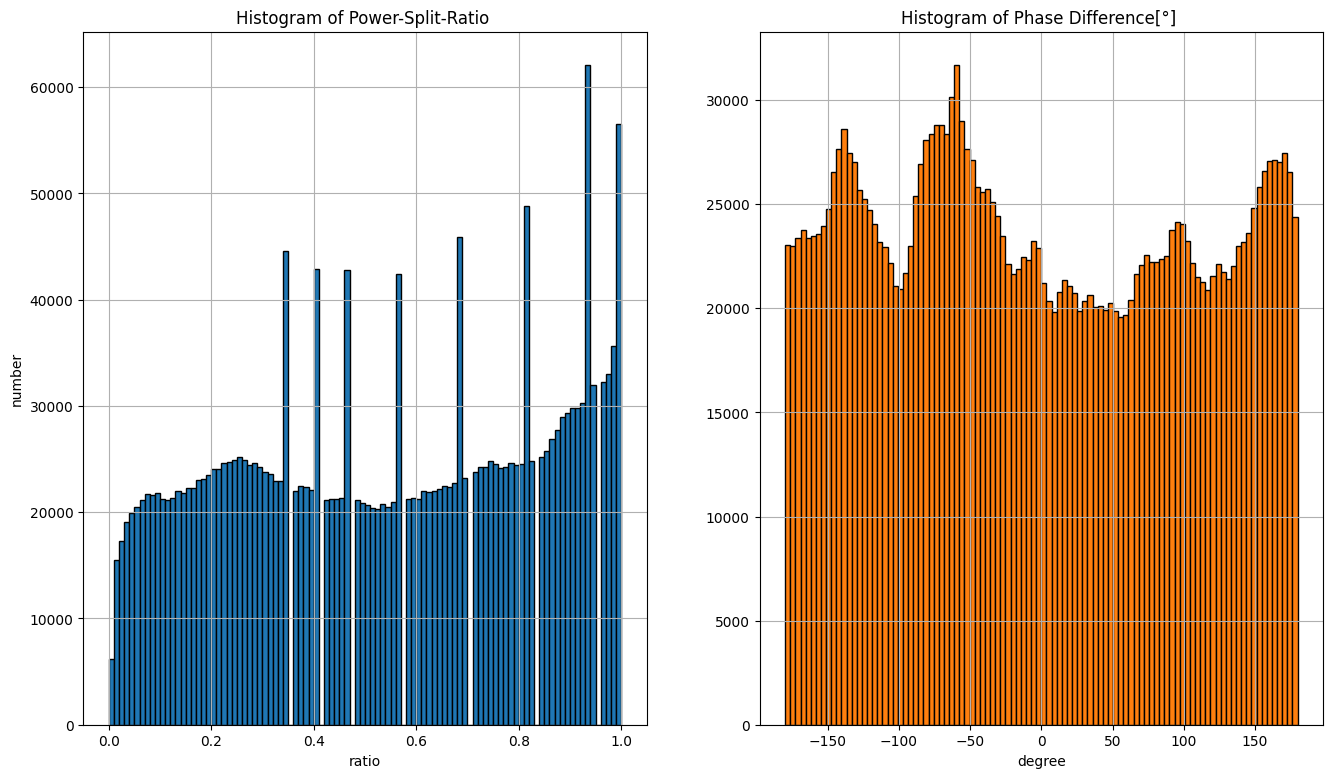

In [94]:
plt.figure(figsize = (16,9))
plt.subplot(1, 2, 1)
plt.hist(modality[columns[20]], bins=100, color='tab:blue', edgecolor='black')
plt.grid()
plt.xlabel('ratio')
plt.ylabel('number') 
plt.title('Histogram of Power-Split-Ratio ')

plt.subplot(1, 2, 2)
plt.hist(modality[columns[21]], bins=100, color='tab:orange', edgecolor='black')
plt.grid()
plt.xlabel('degree')
plt.title('Histogram of Phase Difference[°] ')

plt.show()

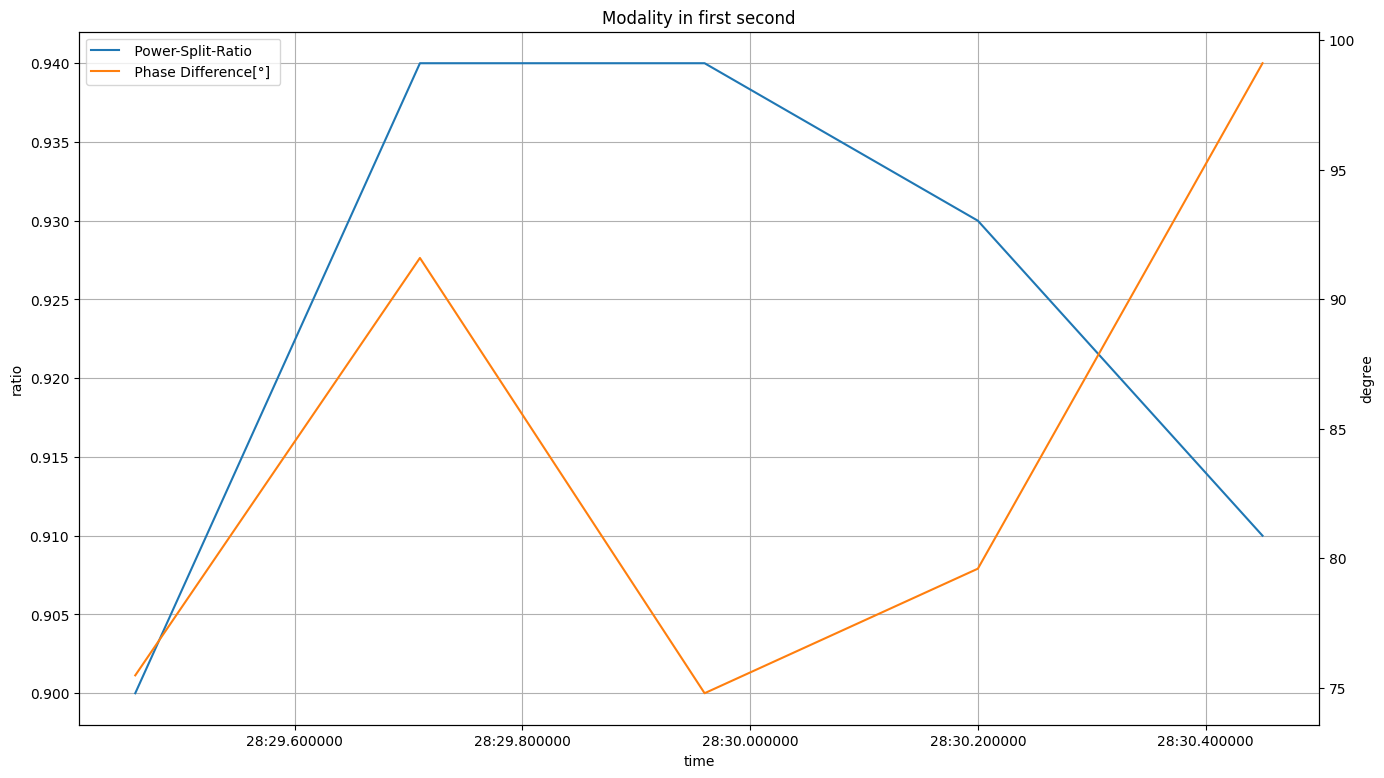

In [95]:
first_second = modality.loc[(modality.index >= start_time) & (modality.index < end_time_second)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_second.index, first_second[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_second.index, first_second[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality in first second')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

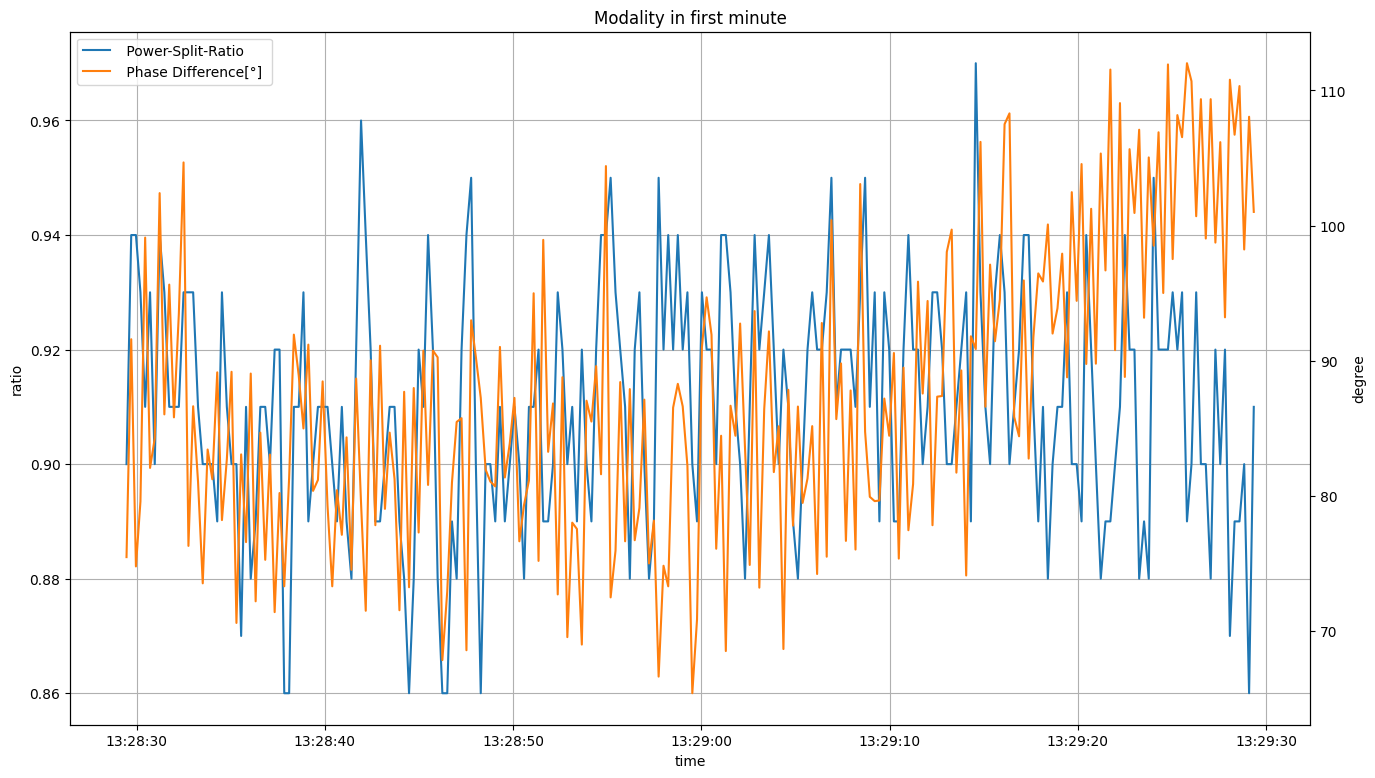

In [96]:
first_minute = modality.loc[(modality.index >= start_time) & (modality.index < end_time_minute)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_minute.index, first_minute[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_minute.index, first_minute[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality in first minute')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

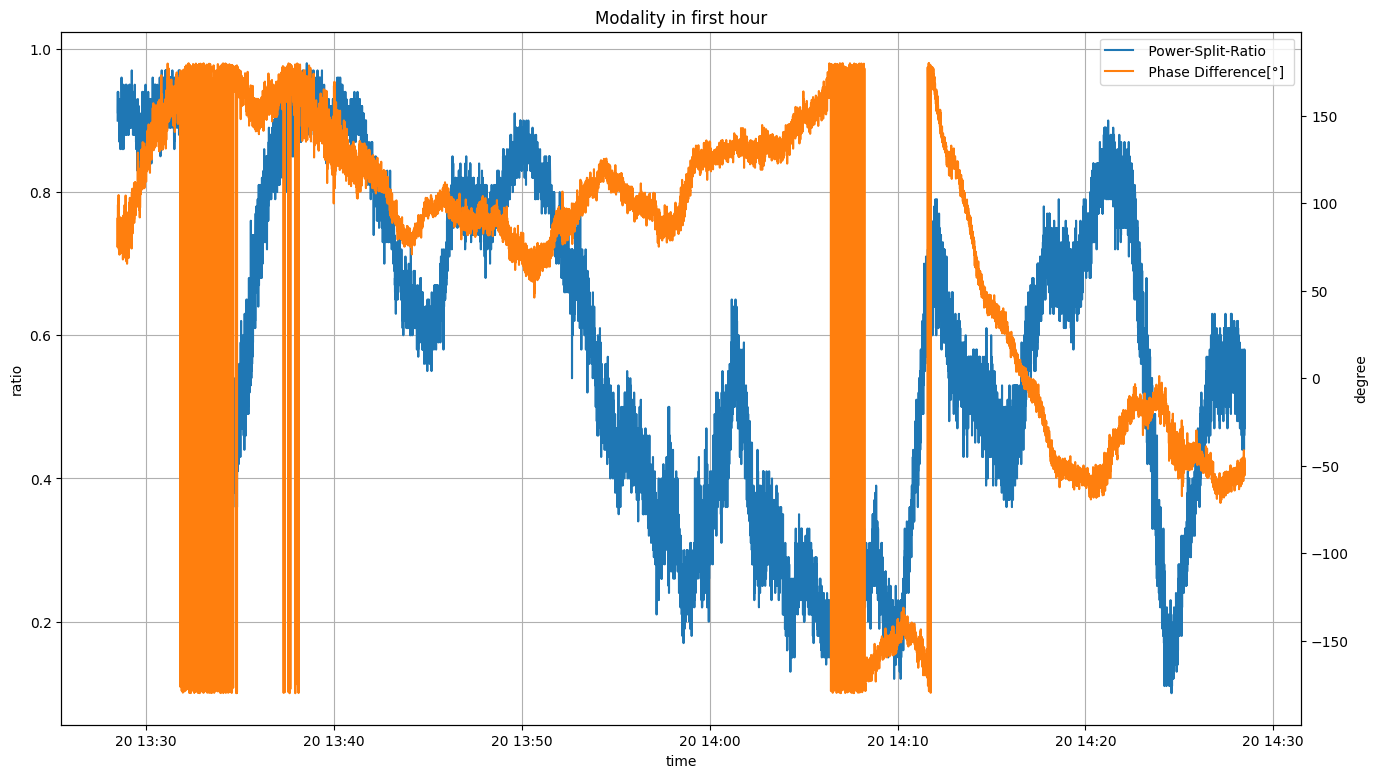

In [97]:
first_hour = modality.loc[(modality.index >= start_time) & (modality.index < end_time_hour)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_hour.index, first_hour[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_hour.index, first_hour[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality in first hour')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

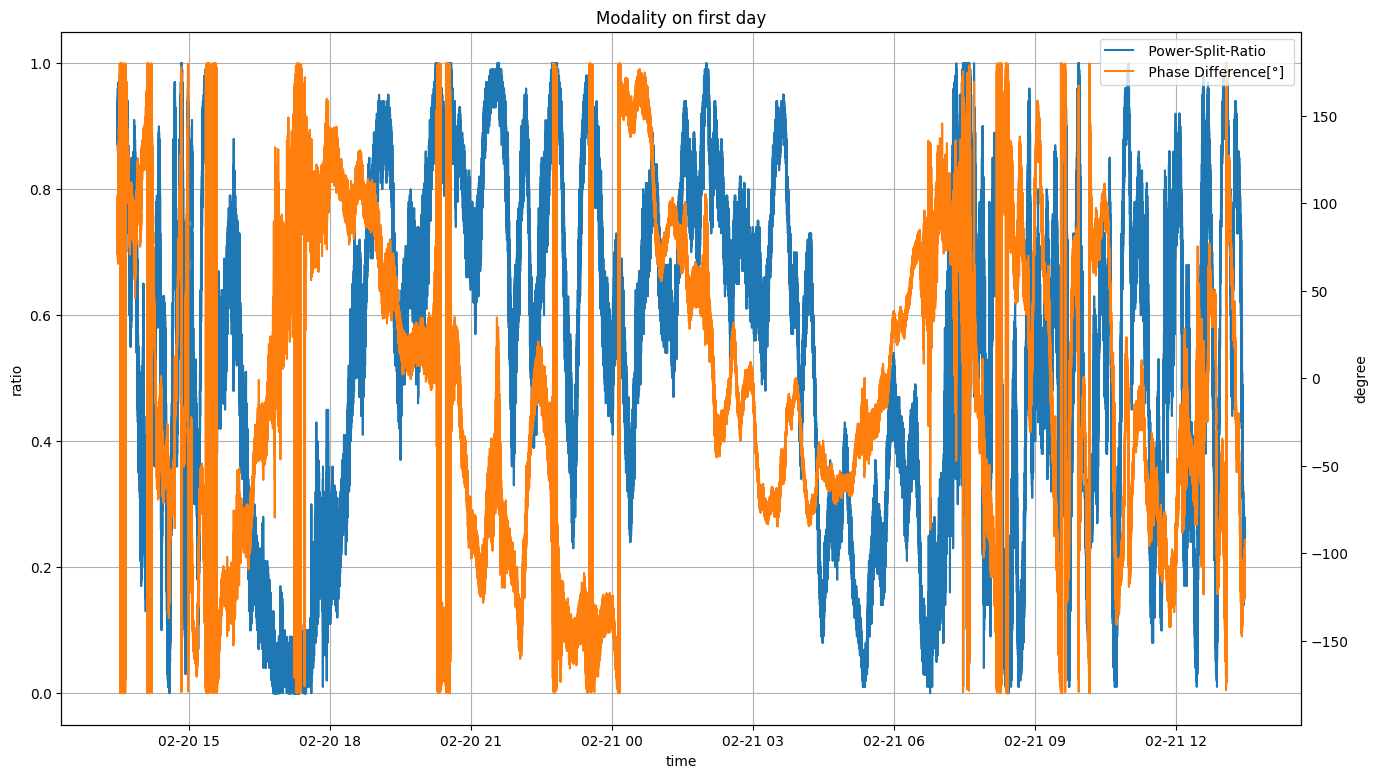

In [98]:
first_day = modality.loc[(modality.index >= start_time) & (modality.index < end_time_day)]

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(first_day.index, first_day[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(first_day.index, first_day[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Modality on first day')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

In [99]:
modality_seconds_resample = modality.resample('s').mean()
modality_seconds_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604811 entries, 2025-02-20 13:28:29 to 2025-02-27 13:28:39
Freq: s
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0    Power-Split-Ratio     604811 non-null  float64
 1    Phase Difference[°]   604811 non-null  float64
dtypes: float64(2)
memory usage: 13.8 MB


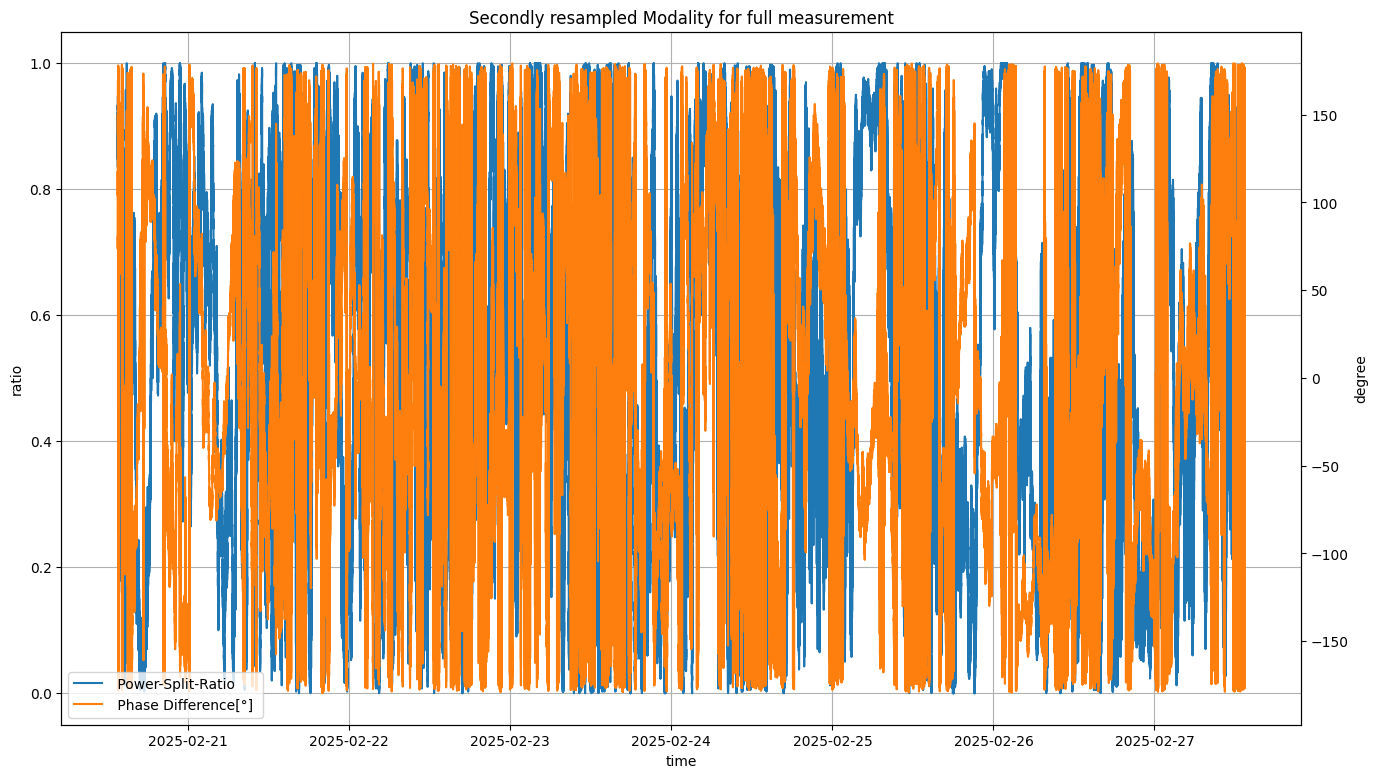

In [100]:
fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(modality_seconds_resample.index, modality_seconds_resample[columns[20]], color='tab:blue', label=columns[20])
ax1.set_xlabel('time')
ax1.set_ylabel('ratio')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(modality_seconds_resample.index, modality_seconds_resample[columns[21]], color='tab:orange', label=columns[21])
ax2.set_ylabel('degree')

plt.title('Secondly resampled Modality for full measurement')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()